In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict

import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.utils.data as data_utils
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
import sklearn
from torch.utils.data.sampler import SubsetRandomSampler

import sys,os
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/MIEST/utils/"))
from imp import reload 
# Change in mymodule/'
import vib_utils
reload(vib_utils)
from vib_utils import *
import mist_utils
reload(mist_utils)
from mist_utils import *

import warnings
warnings.filterwarnings('ignore')

# Device Config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = 'cpu' # temporarily
# Fix random seeds for reproducibility
seed = 73
#torch.manual_seed(seed)
#np.random.seed(seed)a
import sys,os 
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
from plt_utils import generateAxesForMultiplePlots, remove_inner_axes
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
import optuna

# For mist
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'

In [3]:
with torch.no_grad():
    torch.cuda.empty_cache()

In [41]:
sim  = ['TNG', 'SIMBA']; field = 'HI' #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'pywst',
            normalization=True,
            monopole = True,
            device=device,
            proc_imag=np.absolute,
            #robust_axis='field'
        )

You can't use average with projection!
Turning off average...


In [42]:
mist.input.shape

(30000, 67264)

## Raw Maps

In [5]:
sim  = 'TNG'; field = ['HI', 'Mtot'] #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device,
            robust_axis='field'
        )
study_name = "TNG_HI_Mtot_cnn_zero_monopole_1zdim_50"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath,z_dim=50)
mist.get_score_cnn()
mist.make_plots_cnn(fname='cnn_test', save_plot=False)
mist.test_on_cnn('SIMBA', show_score=True)
mist.test_on_cnn('ASTRID', show_score=True)

KeyError: 'Record does not exist.'

In [ ]:
sim  = 'TNG'; field = ['HI', 'Mtot'] #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device,
            robust_axis='field'
        )
study_name = "TNG_HI_Mtot_cnn_zero_monopole_1_zdim_20"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath,z_dim=20)
mist.get_score_cnn()
mist.make_plots_cnn(fname='cnn_test', save_plot=False)
mist.test_on_cnn('SIMBA', show_score=True)
mist.test_on_cnn('ASTRID', show_score=True)

$\Omega_m$: MSE=0.000, % error=3.050%, R2 score=0.989,chi2=0.551, bias=0.002
$\sigma_8$: MSE=0.001, % error=2.898%, R2 score=0.933,chi2=1.007, bias=0.001
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.006, % error=14.049%, R2 score=0.560,chi2=28.755, bias=0.040
$\sigma_8$: MSE=0.015, % error=11.403%, R2 score=-0.109,chi2=17.441, bias=-0.036
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.001, % error=6.322%, R2 score=0.957,chi2=2.403, bias=0.008
$\sigma_8$: MSE=0.006, % error=8.533%, R2 score=0.529,chi2=6.781, bias=-0.048


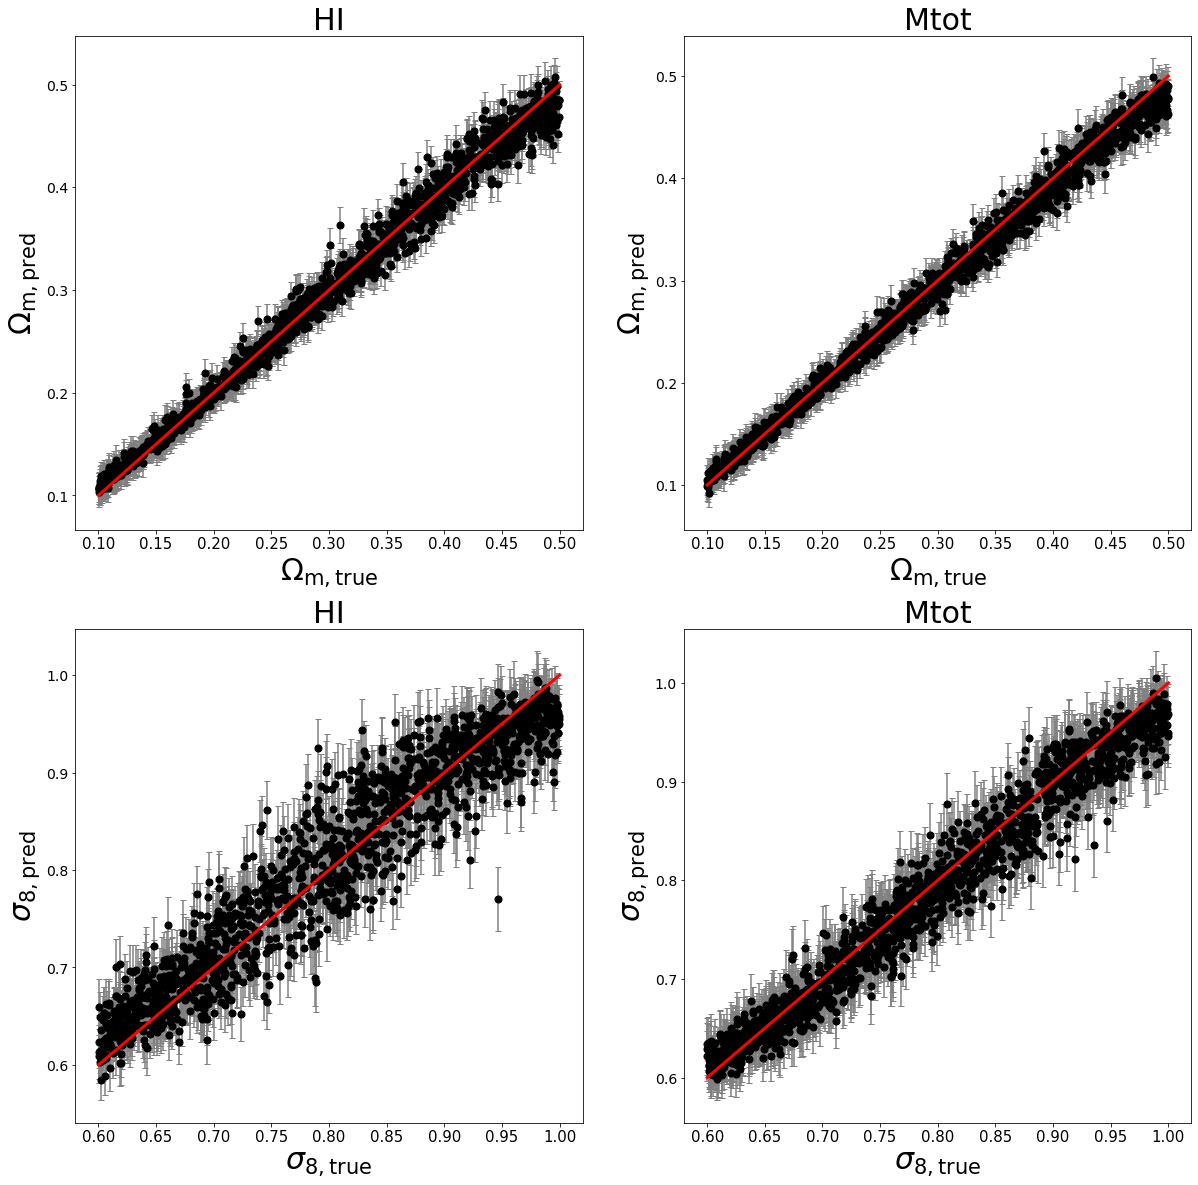

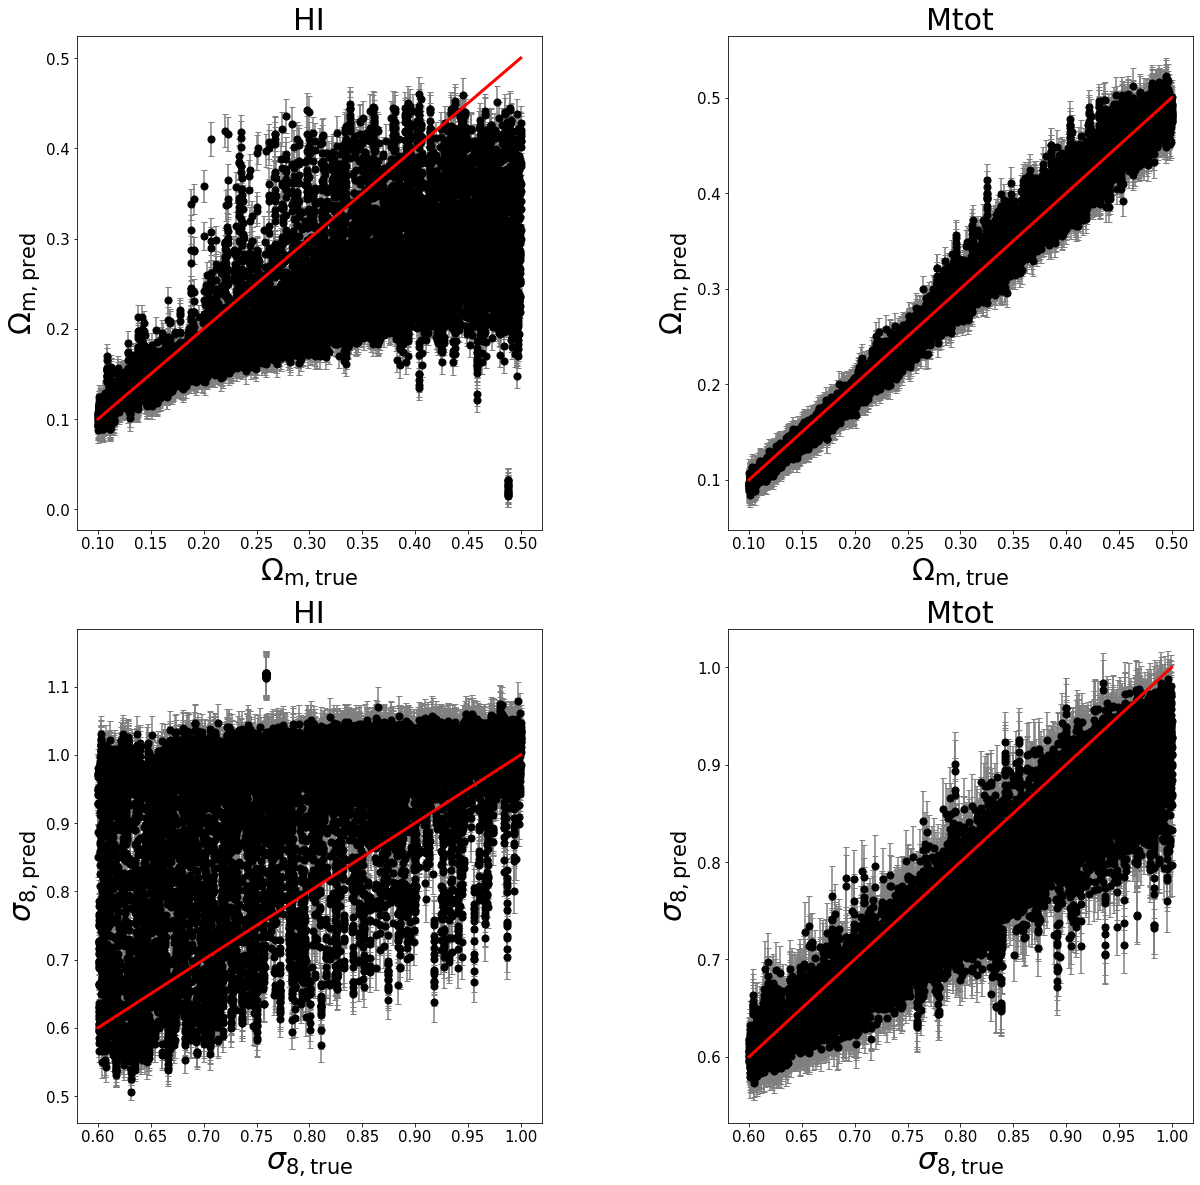

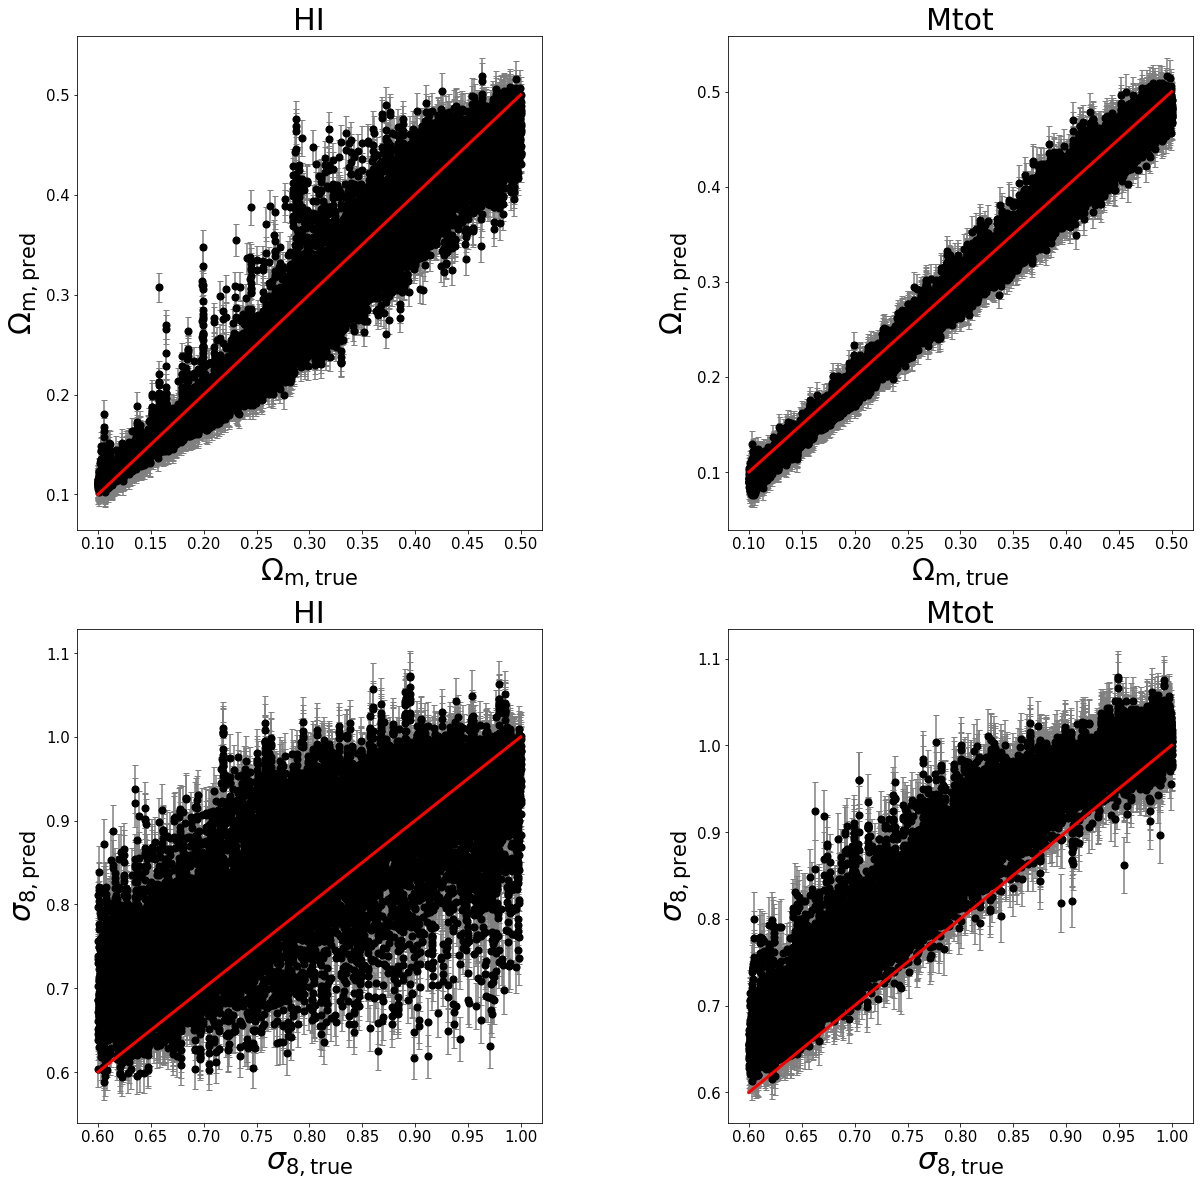

In [25]:
sim  = 'TNG'; field = ['HI', 'Mtot'] #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device,
            robust_axis='field'
        )
study_name = "TNG_HI_Mtot_cnn_zero_monopole_1"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
mist.make_plots_cnn(fname='cnn_test', save_plot=False)
mist.test_on_cnn('SIMBA', show_score=True)
mist.test_on_cnn('ASTRID', show_score=True)

$\Omega_m$: MSE=0.000, % error=4.621%, R2 score=0.976,chi2=0.426, bias=0.002
$\sigma_8$: MSE=0.002, % error=4.434%, R2 score=0.844,chi2=0.778, bias=0.009
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.004, % error=14.175%, R2 score=0.696,chi2=4.848, bias=0.001
$\sigma_8$: MSE=0.026, % error=15.815%, R2 score=-0.978,chi2=9.587, bias=-0.055
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.001, % error=7.815%, R2 score=0.927,chi2=1.286, bias=0.004
$\sigma_8$: MSE=0.005, % error=6.566%, R2 score=0.610,chi2=1.949, bias=0.000


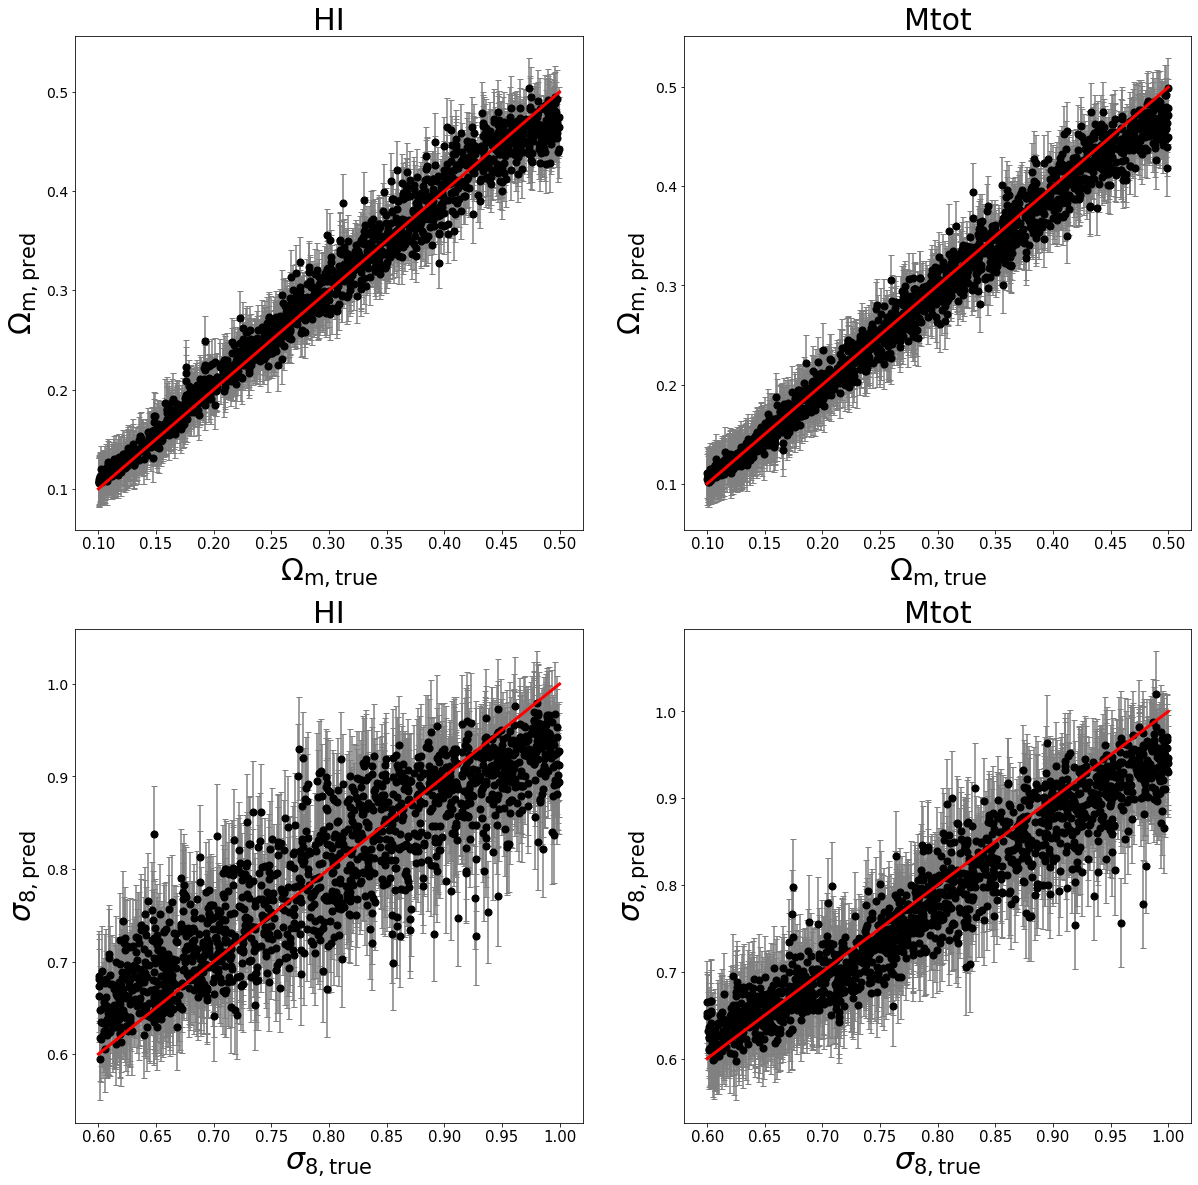

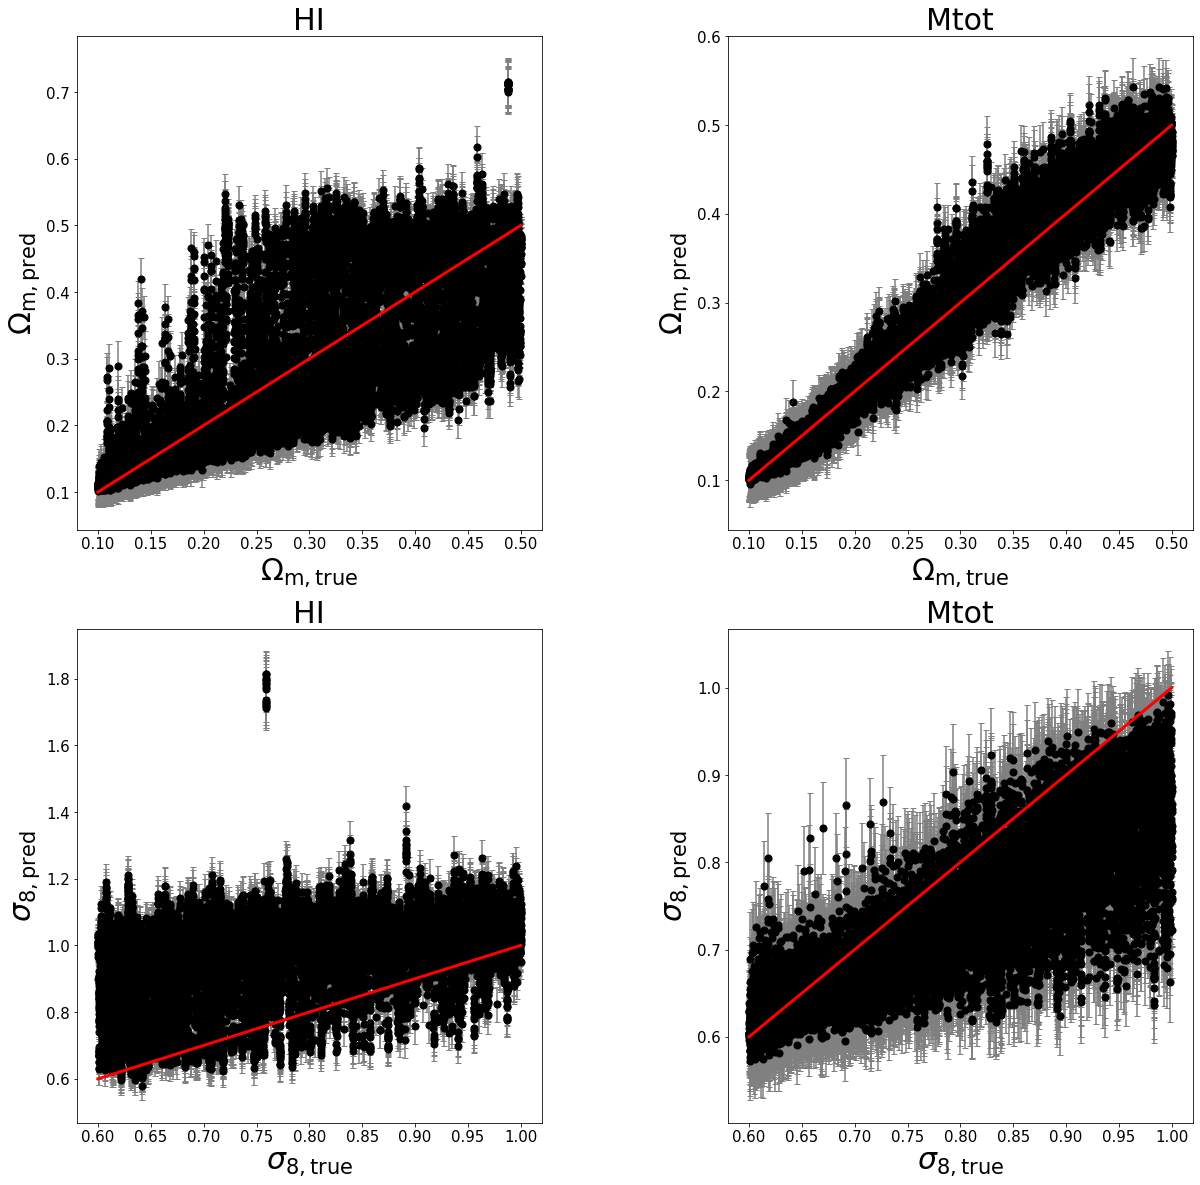

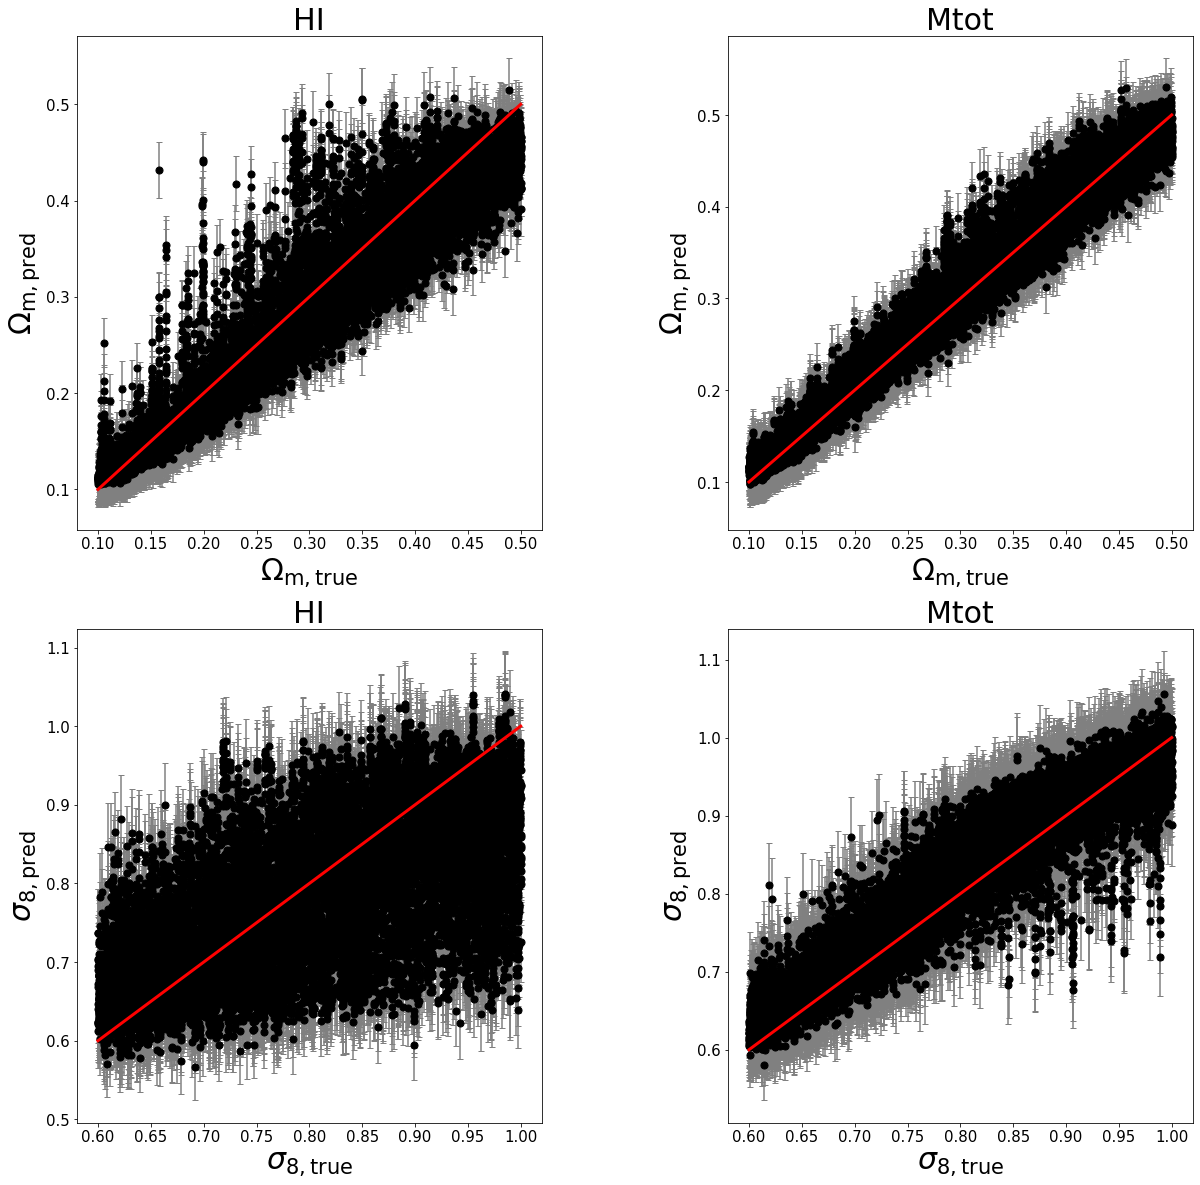

In [26]:
sim  = 'TNG'; field = ['HI', 'Mtot'] #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device,
            robust_axis='field'
        )
study_name = "TNG_HI_Mtot_cnn_mid_monopole_1"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
mist.make_plots_cnn(fname='cnn_test', save_plot=False)
mist.test_on_cnn('SIMBA', show_score=True)
mist.test_on_cnn('ASTRID', show_score=True)

$\Omega_m$: MSE=0.000, % error=5.024%, R2 score=0.971,chi2=0.727, bias=-0.002
$\sigma_8$: MSE=0.002, % error=4.385%, R2 score=0.855,chi2=0.984, bias=0.010
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.011, % error=19.877%, R2 score=0.160,chi2=56.285, bias=0.047
$\sigma_8$: MSE=0.020, % error=14.438%, R2 score=-0.488,chi2=9.096, bias=-0.048
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.002, % error=12.939%, R2 score=0.816,chi2=7.924, bias=0.015
$\sigma_8$: MSE=0.013, % error=11.701%, R2 score=0.004,chi2=6.076, bias=-0.079


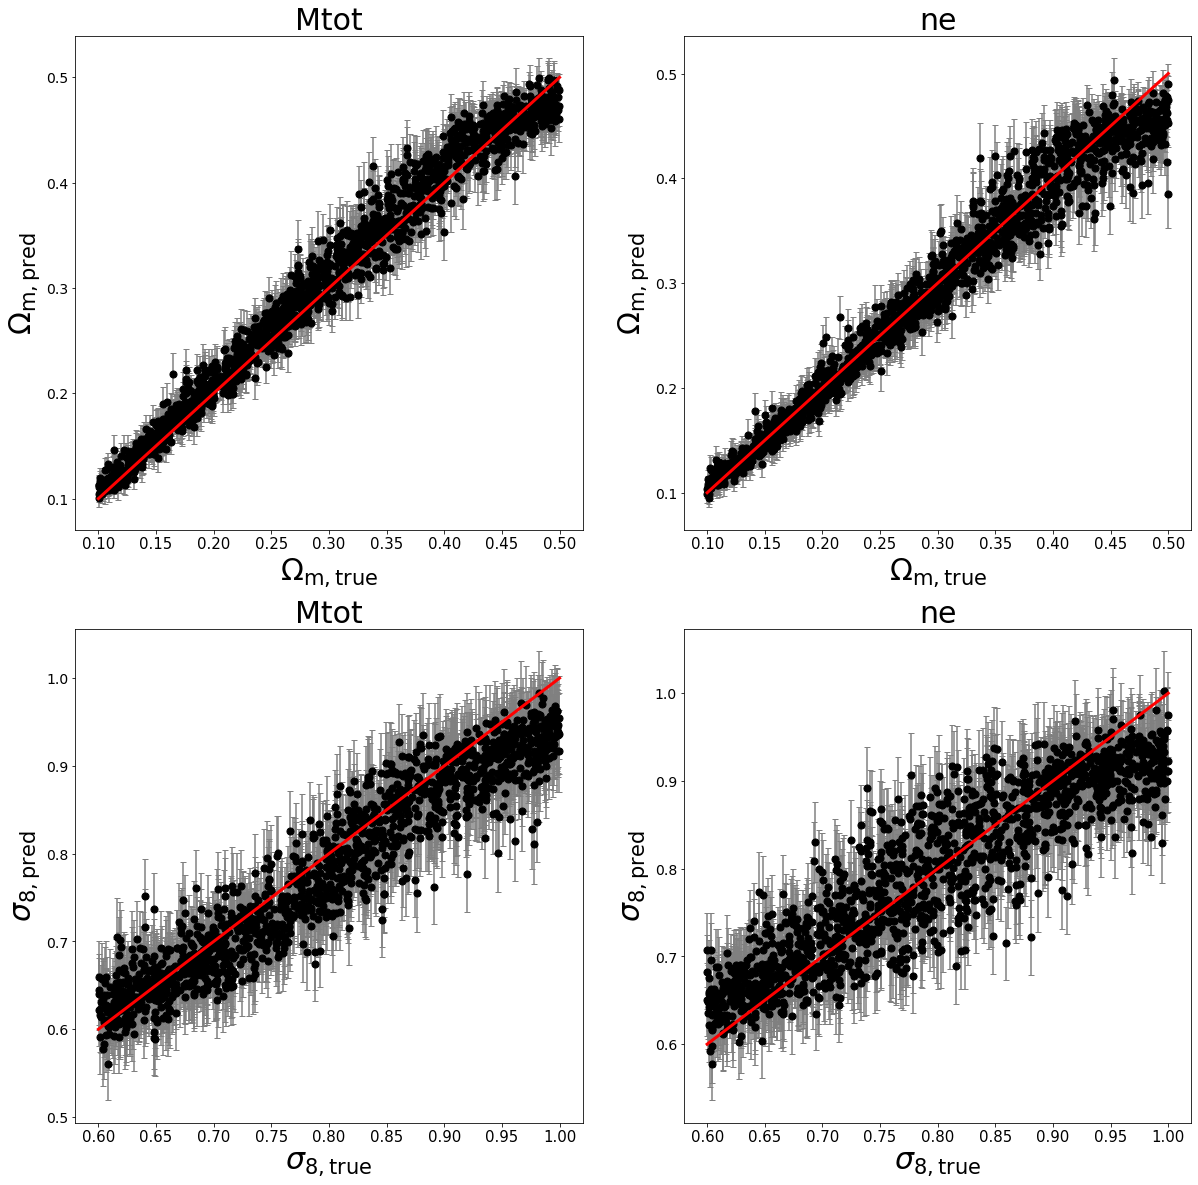

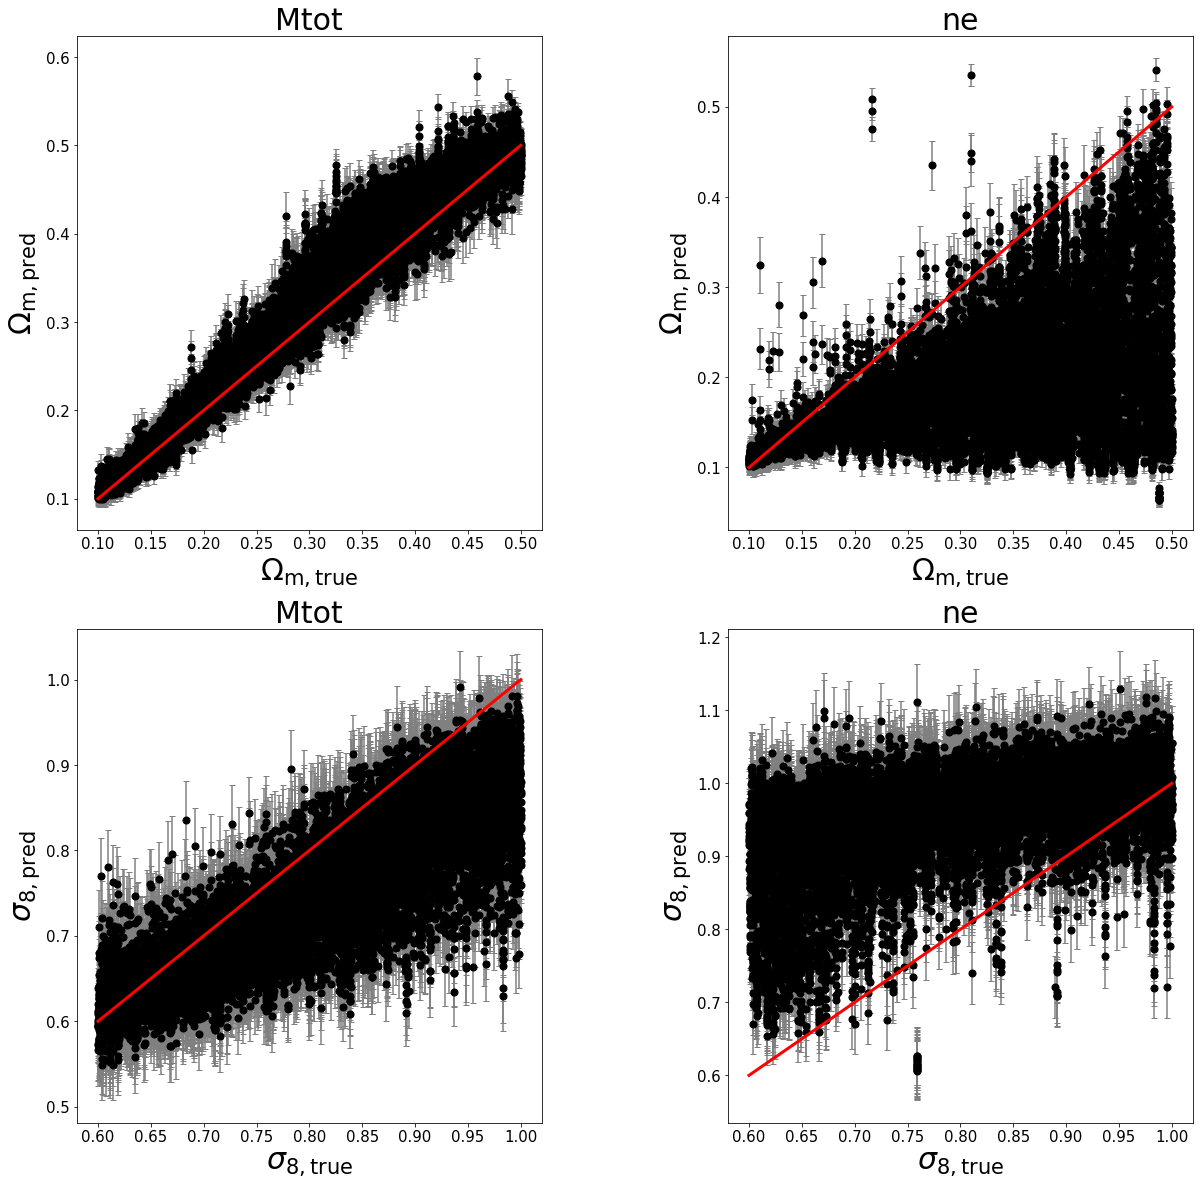

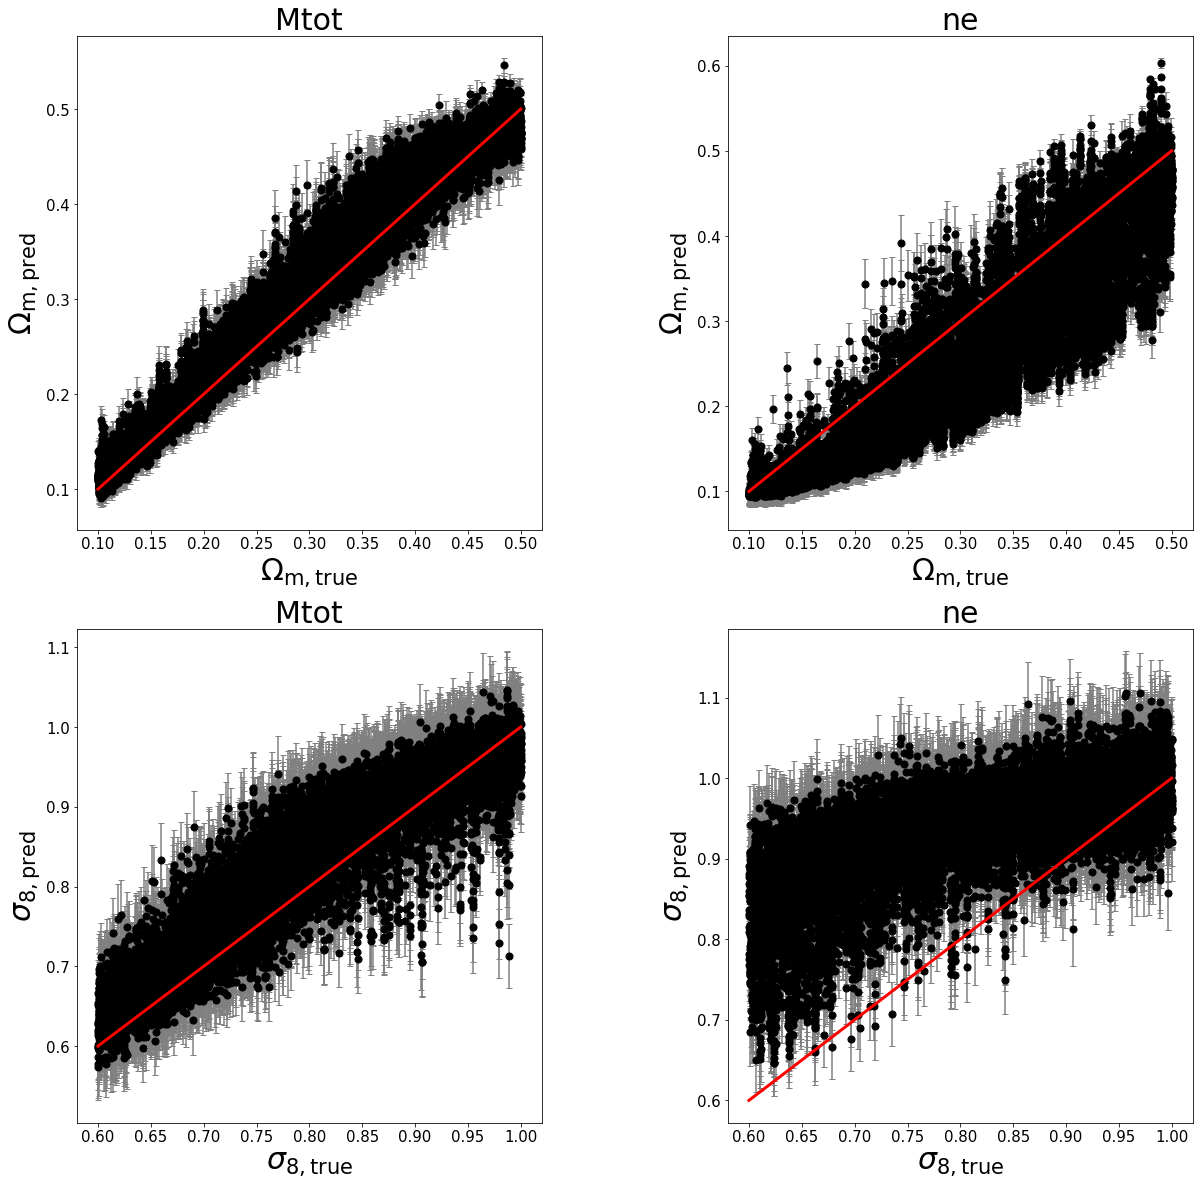

In [8]:
sim  = 'TNG'; field = ['Mtot', 'ne'] #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device,
            robust_axis='field'
        )
study_name = "TNG_Mtot_ne_cnn_mid_monopole_1zdim_50"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath,z_dim=50)
mist.get_score_cnn()
mist.make_plots_cnn(fname='cnn_test', save_plot=False)
mist.test_on_cnn('SIMBA', show_score=True)
mist.test_on_cnn('ASTRID', show_score=True)

$\Omega_m$: MSE=0.000, % error=5.388%, R2 score=0.966,chi2=0.733, bias=0.000
$\sigma_8$: MSE=0.014, % error=13.105%, R2 score=-0.001,chi2=1.022, bias=-0.003
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.011, % error=17.864%, R2 score=0.206,chi2=27.880, bias=0.053
$\sigma_8$: MSE=0.013, % error=12.930%, R2 score=-0.001,chi2=1.035, bias=-0.001
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.001, % error=9.319%, R2 score=0.901,chi2=2.543, bias=0.015
$\sigma_8$: MSE=0.013, % error=12.926%, R2 score=-0.002,chi2=1.012, bias=-0.001


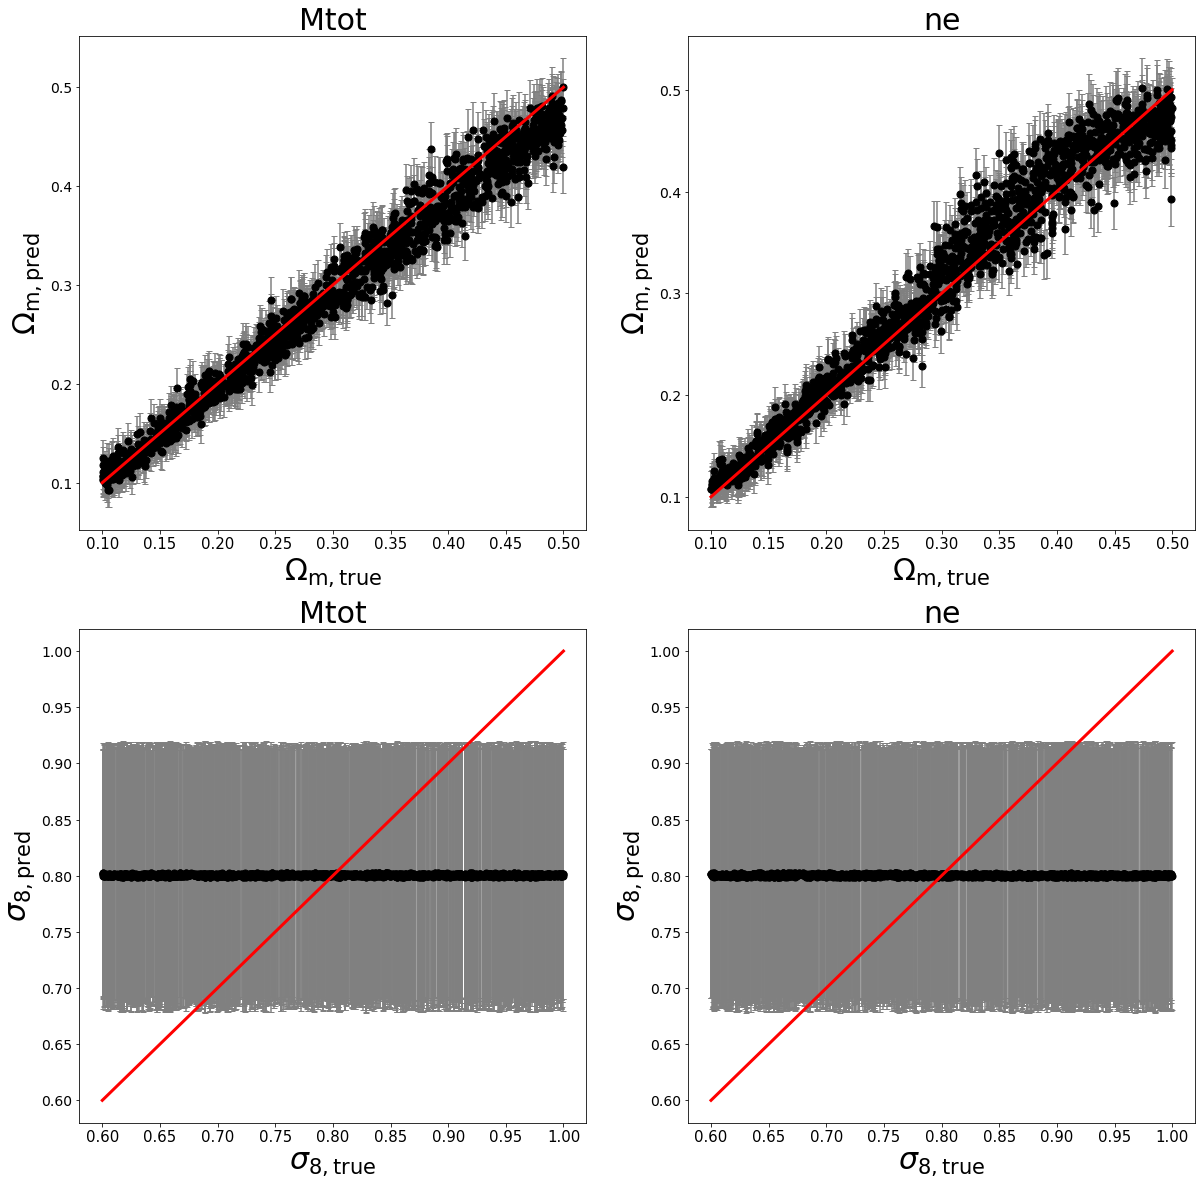

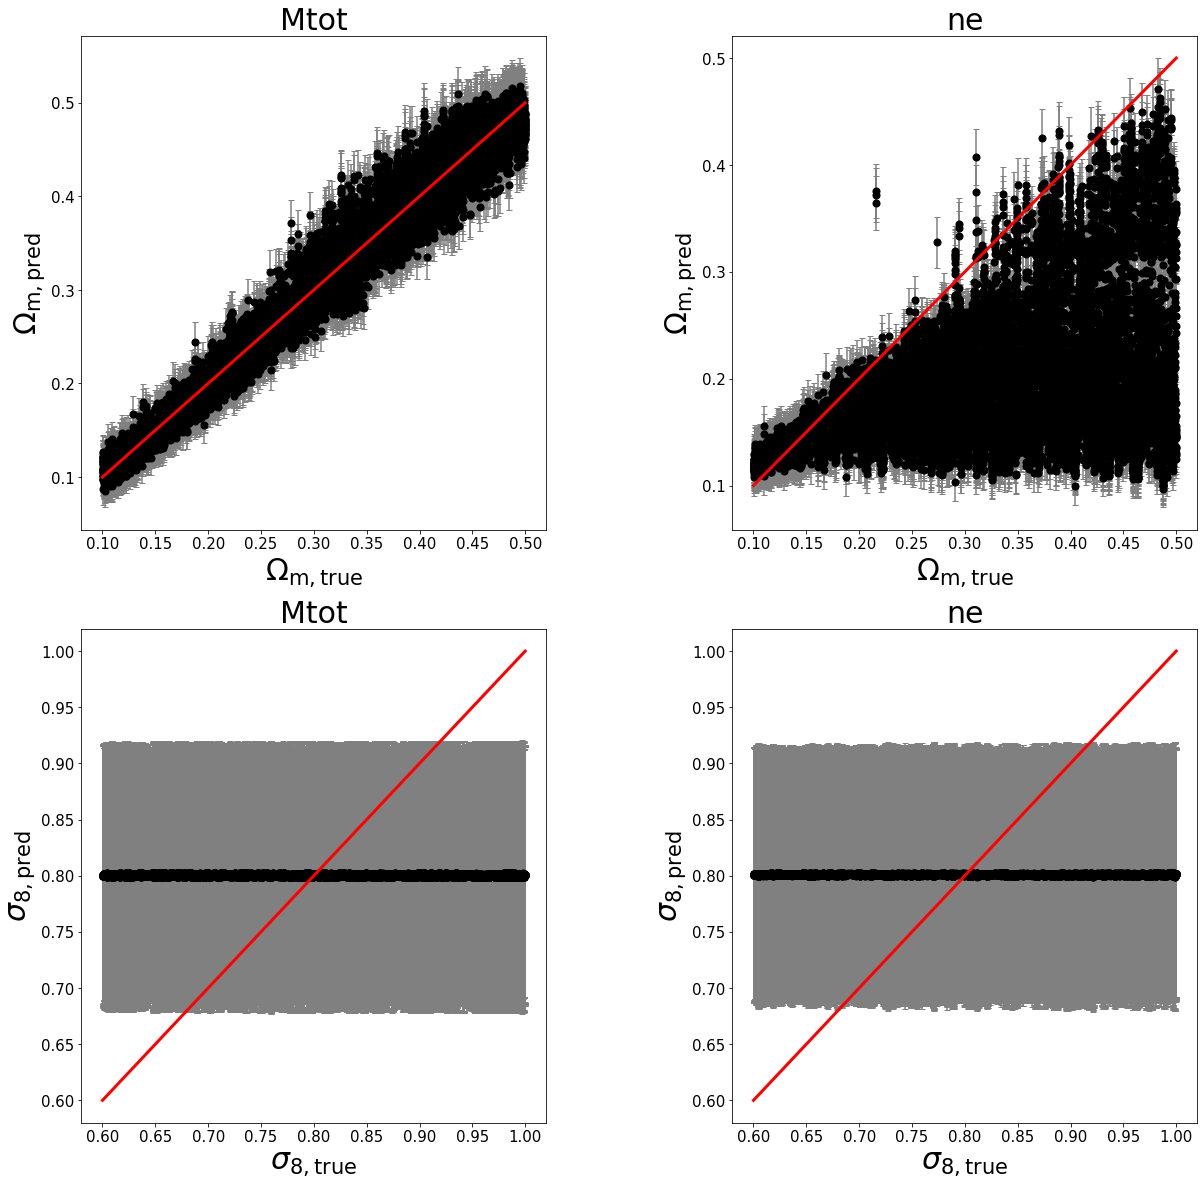

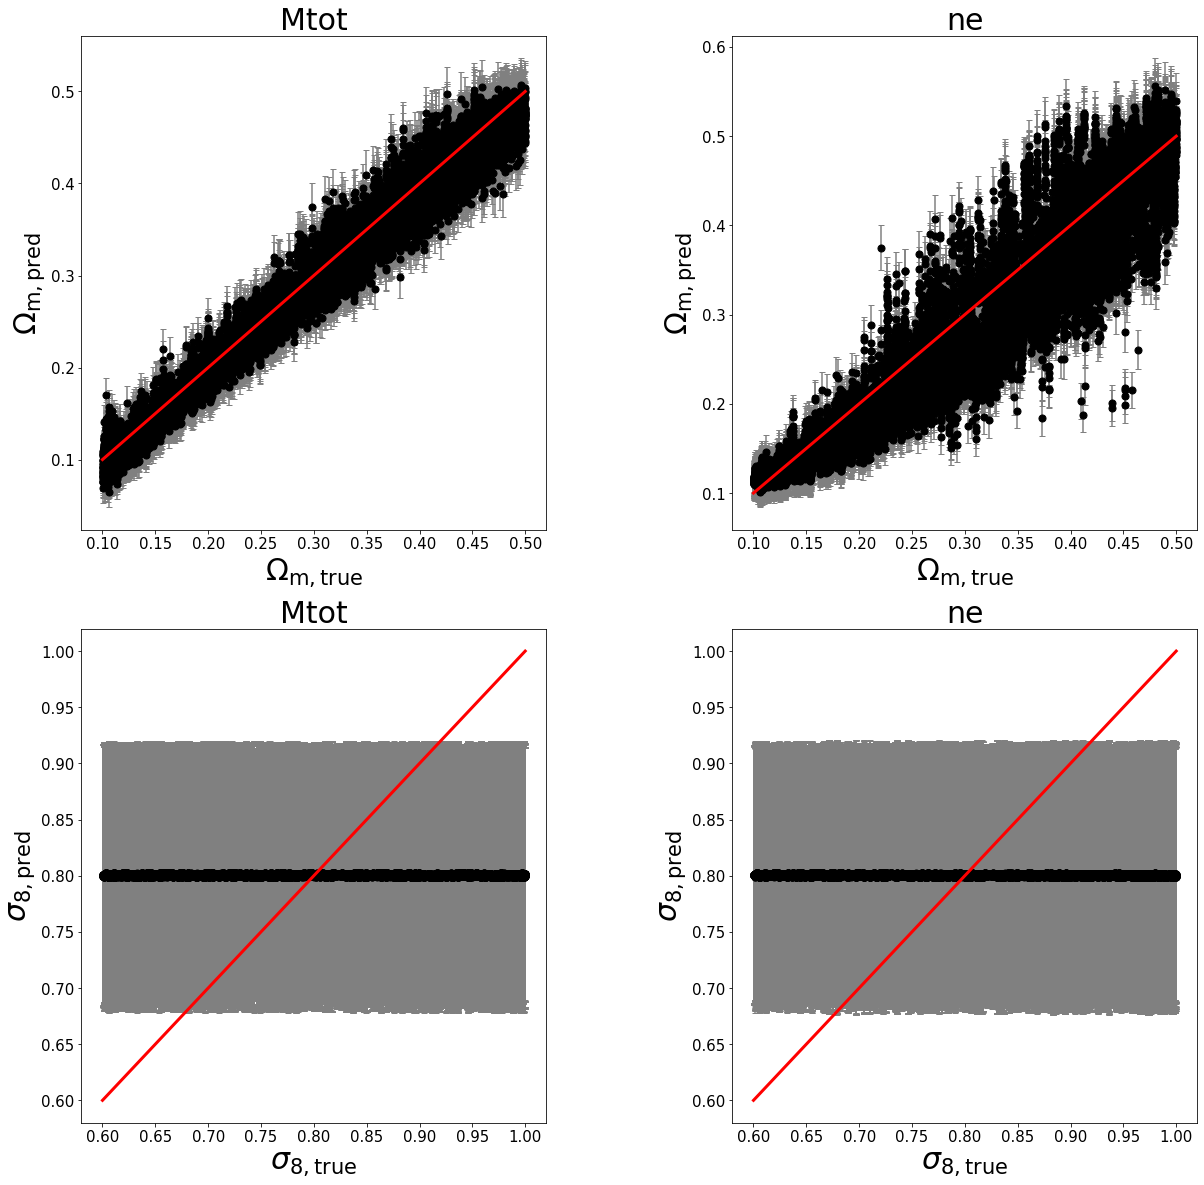

In [7]:
sim  = 'TNG'; field = ['Mtot', 'ne'] #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device,
            robust_axis='field'
        )
study_name = "TNG_Mtot_ne_cnn_mid_monopole_1_zdim_20"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath,z_dim=20)
mist.get_score_cnn()
mist.make_plots_cnn(fname='cnn_test', save_plot=False)
mist.test_on_cnn('SIMBA', show_score=True)
mist.test_on_cnn('ASTRID', show_score=True)

$\Omega_m$: MSE=0.000, % error=3.898%, R2 score=0.980,chi2=0.518, bias=0.001
$\sigma_8$: MSE=0.002, % error=4.100%, R2 score=0.877,chi2=1.275, bias=0.010
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.011, % error=19.194%, R2 score=0.202,chi2=21.401, bias=0.045
$\sigma_8$: MSE=0.019, % error=13.862%, R2 score=-0.390,chi2=13.393, bias=-0.025
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.002, % error=13.050%, R2 score=0.818,chi2=4.901, bias=0.012
$\sigma_8$: MSE=0.019, % error=12.986%, R2 score=-0.400,chi2=13.367, bias=-0.088


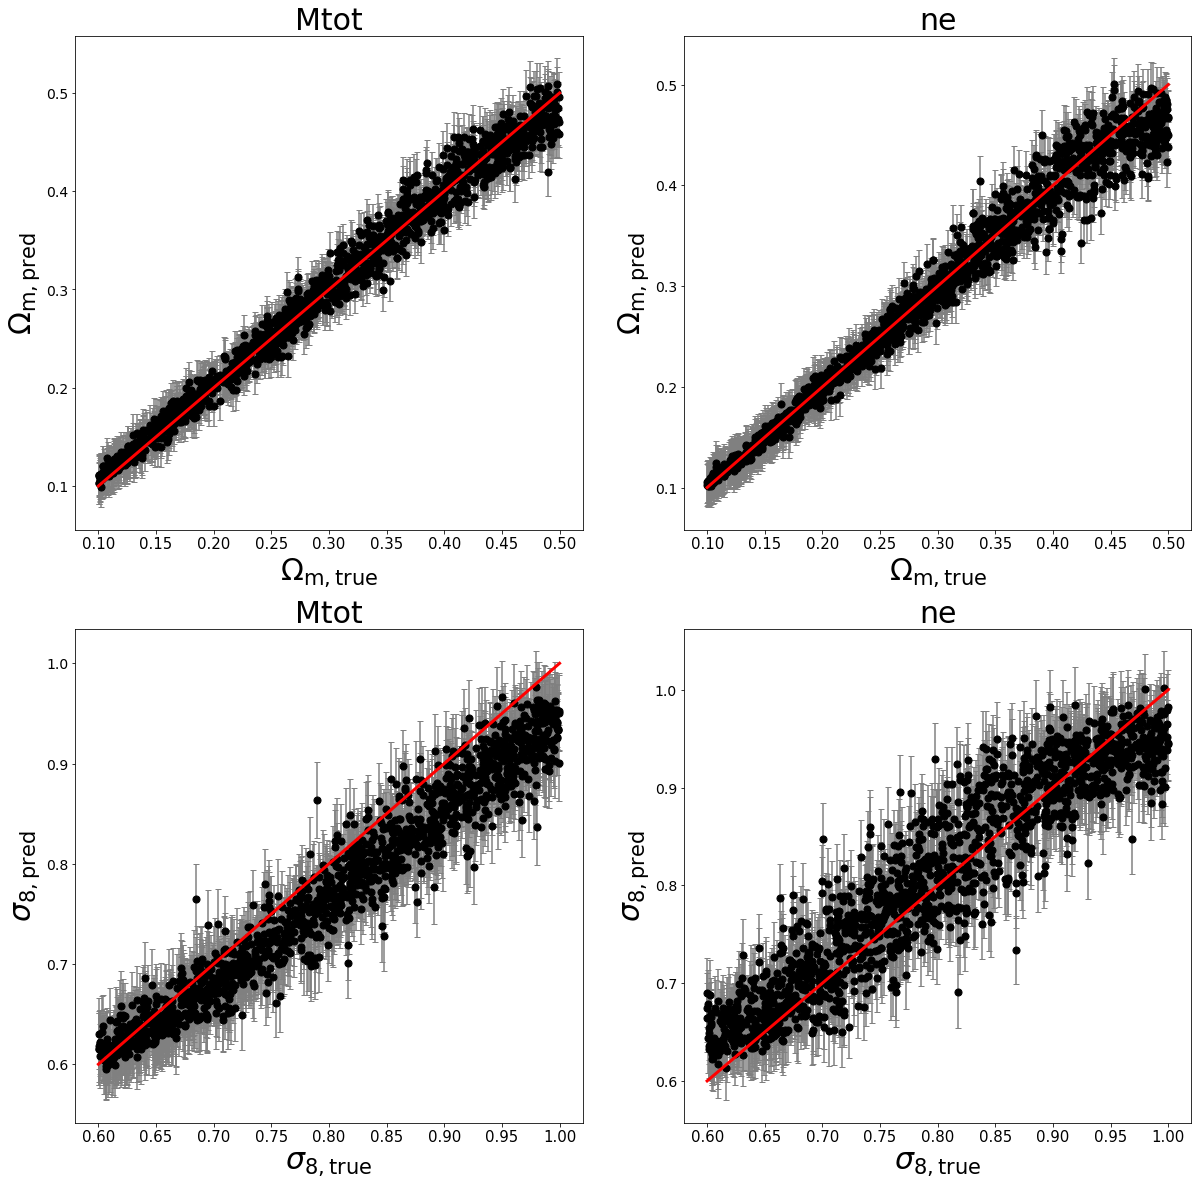

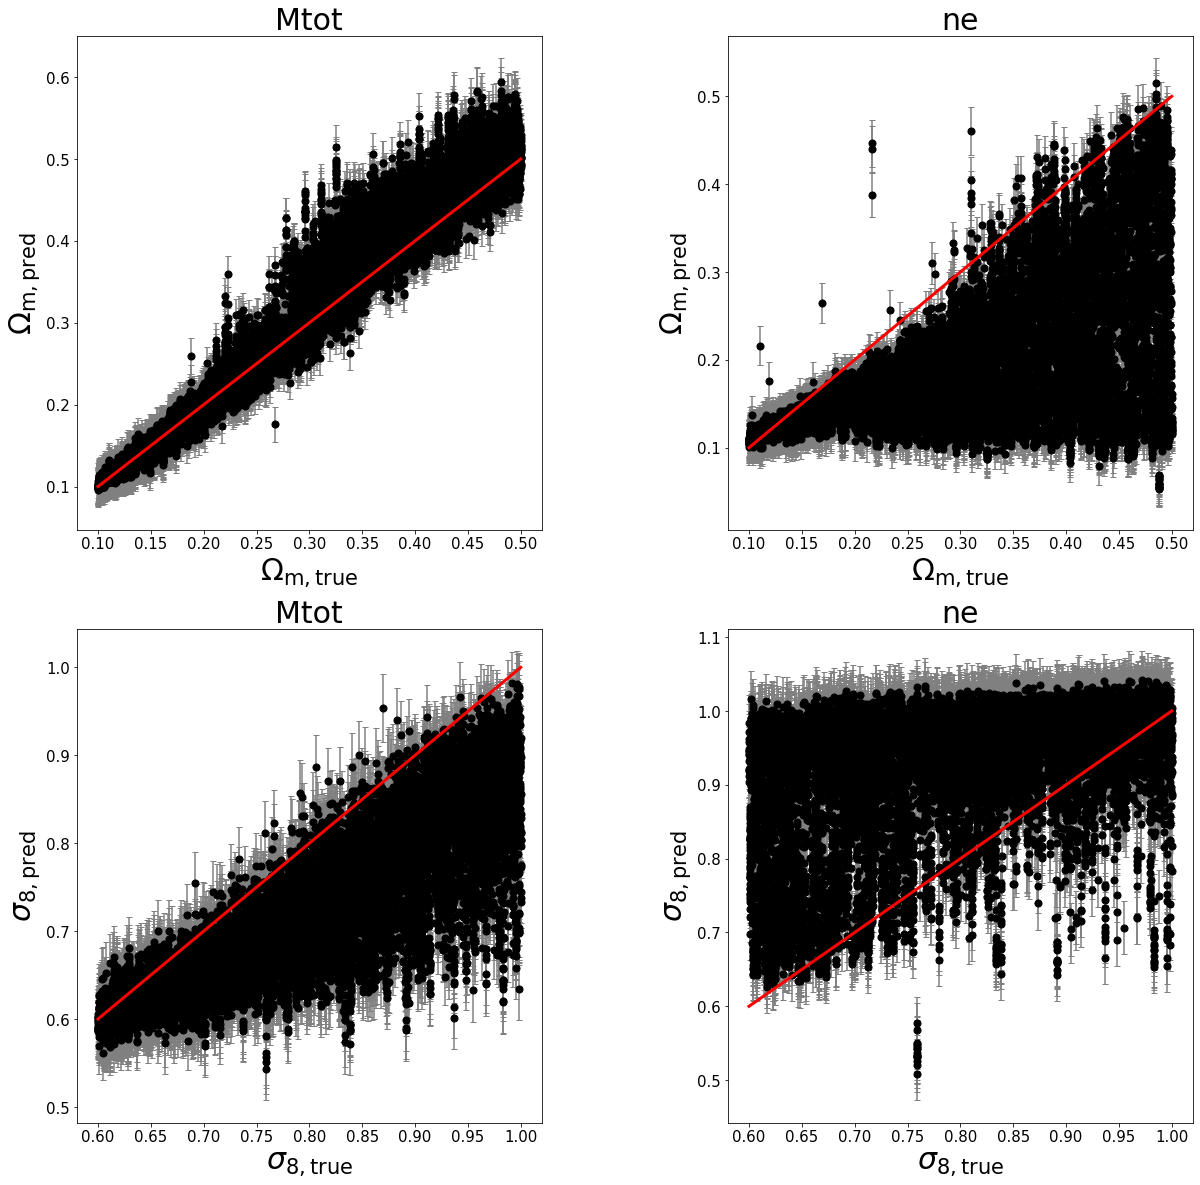

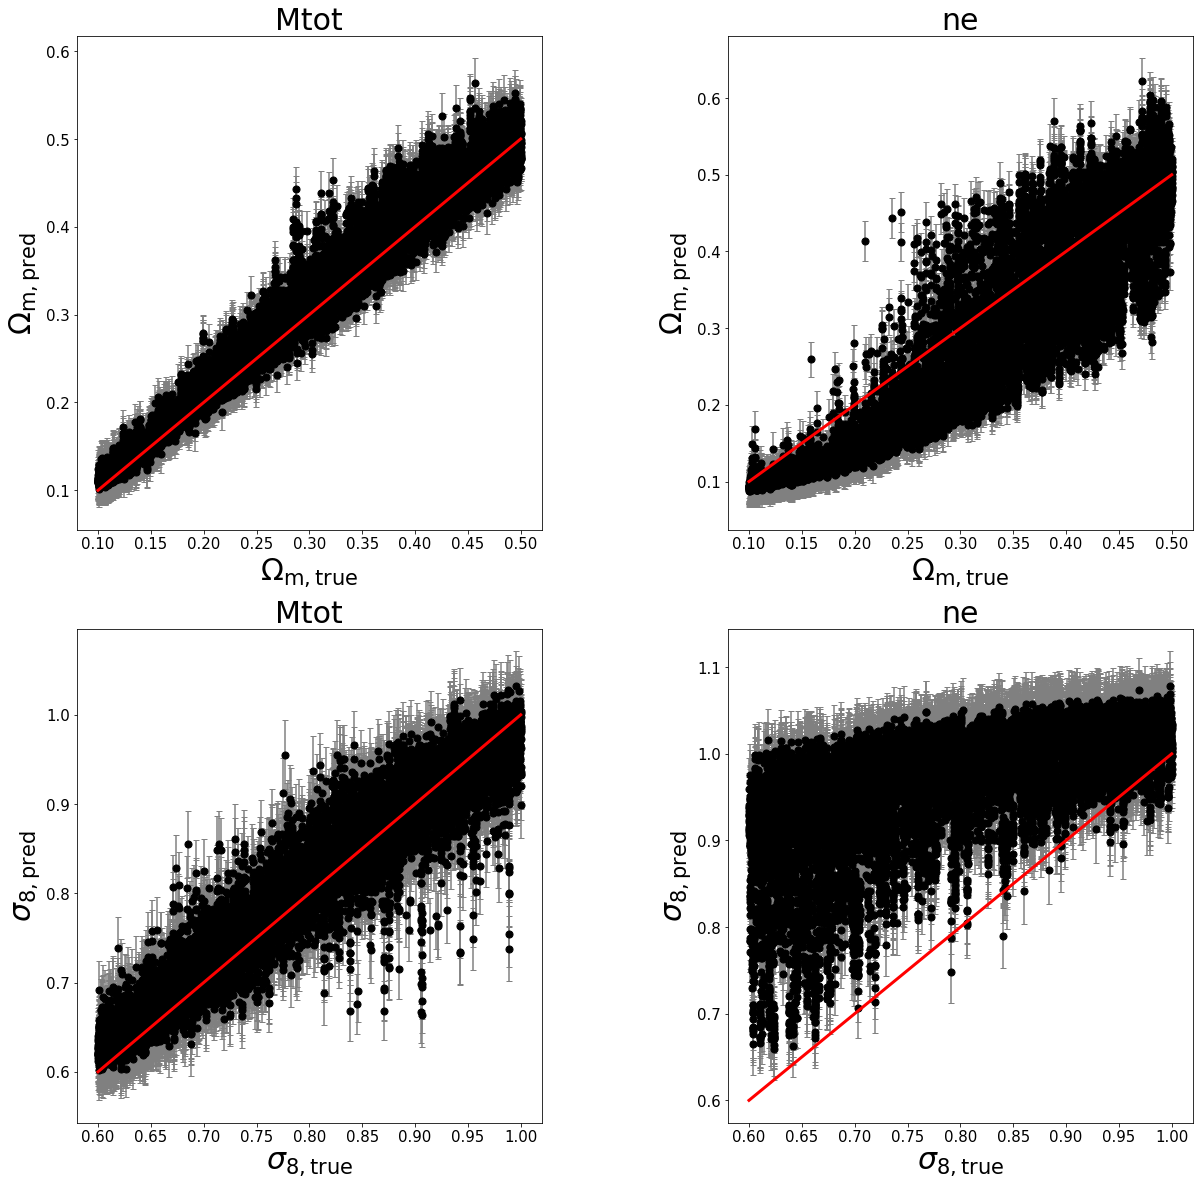

In [27]:
sim  = 'TNG'; field = ['Mtot', 'ne'] #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device,
            robust_axis='field'
        )
study_name = "TNG_Mtot_ne_cnn_zero_monopole_1"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
mist.make_plots_cnn(fname='cnn_test', save_plot=False)
mist.test_on_cnn('SIMBA', show_score=True)
mist.test_on_cnn('ASTRID', show_score=True)

$\Omega_m$: MSE=0.000, % error=4.425%, R2 score=0.976,chi2=0.412, bias=-0.000
$\sigma_8$: MSE=0.002, % error=4.401%, R2 score=0.854,chi2=0.825, bias=0.007
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.012, % error=19.864%, R2 score=0.075,chi2=20.138, bias=0.058
$\sigma_8$: MSE=0.019, % error=13.652%, R2 score=-0.395,chi2=7.704, bias=-0.051
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.002, % error=11.817%, R2 score=0.844,chi2=3.037, bias=0.014
$\sigma_8$: MSE=0.013, % error=11.751%, R2 score=0.050,chi2=5.146, bias=-0.082


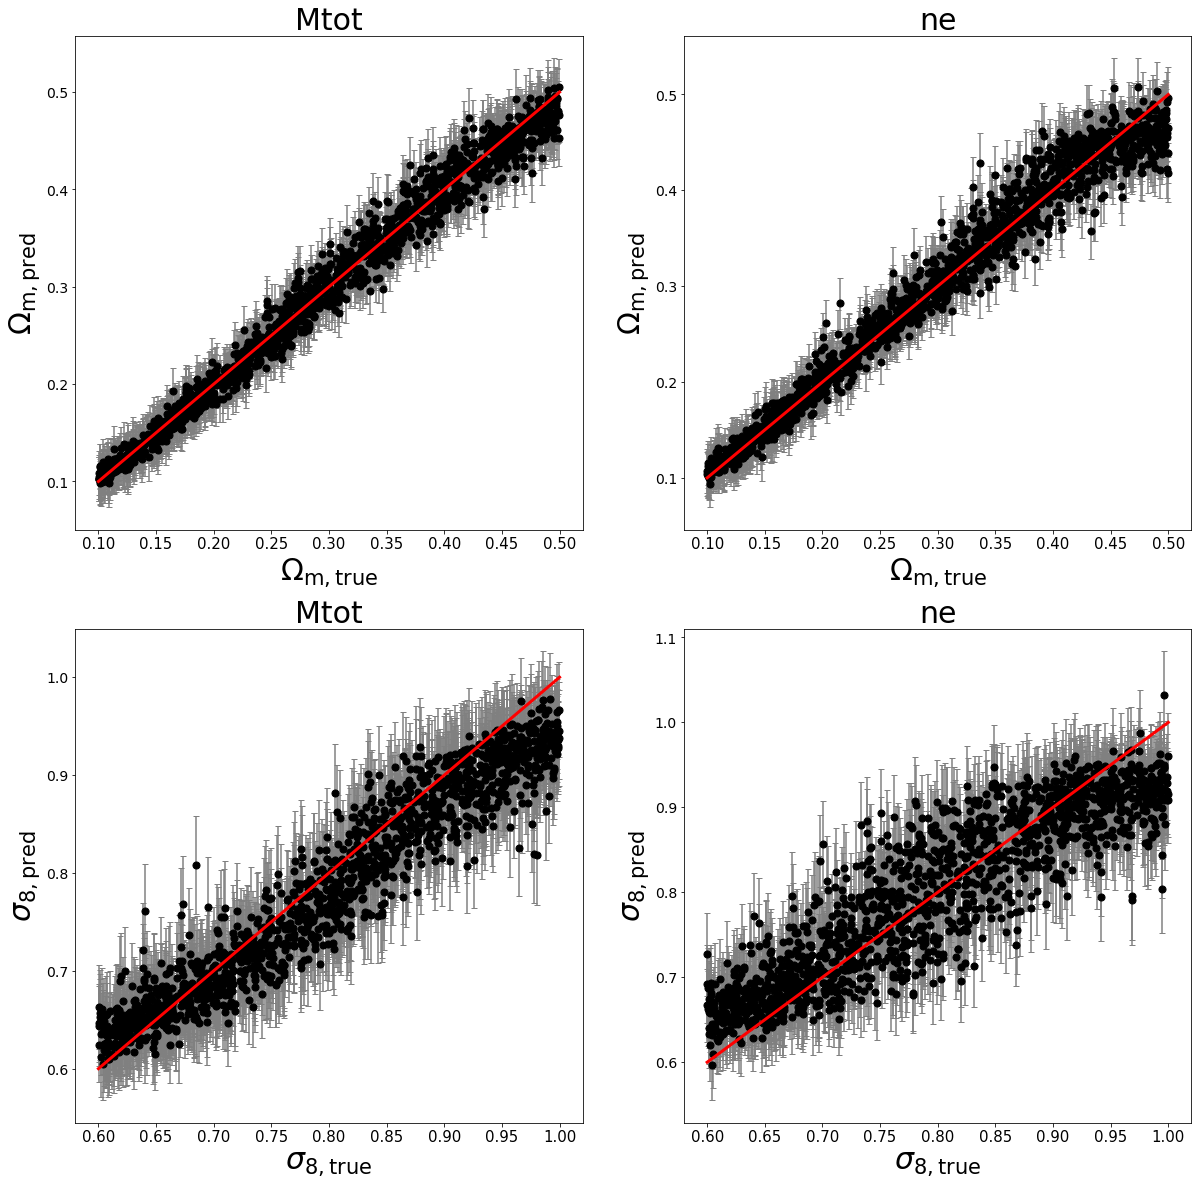

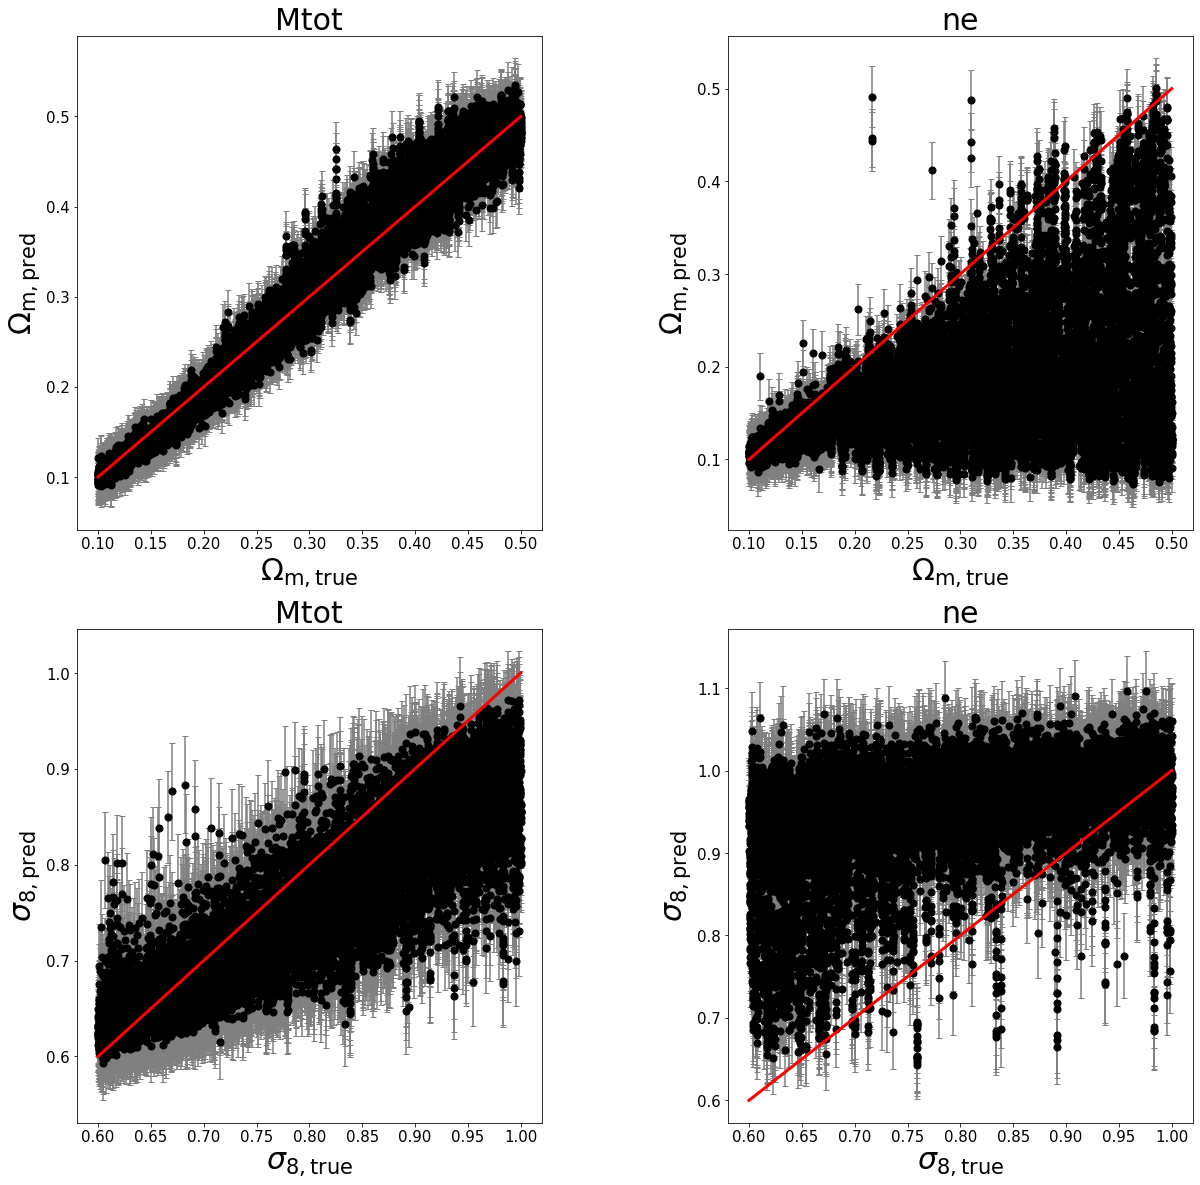

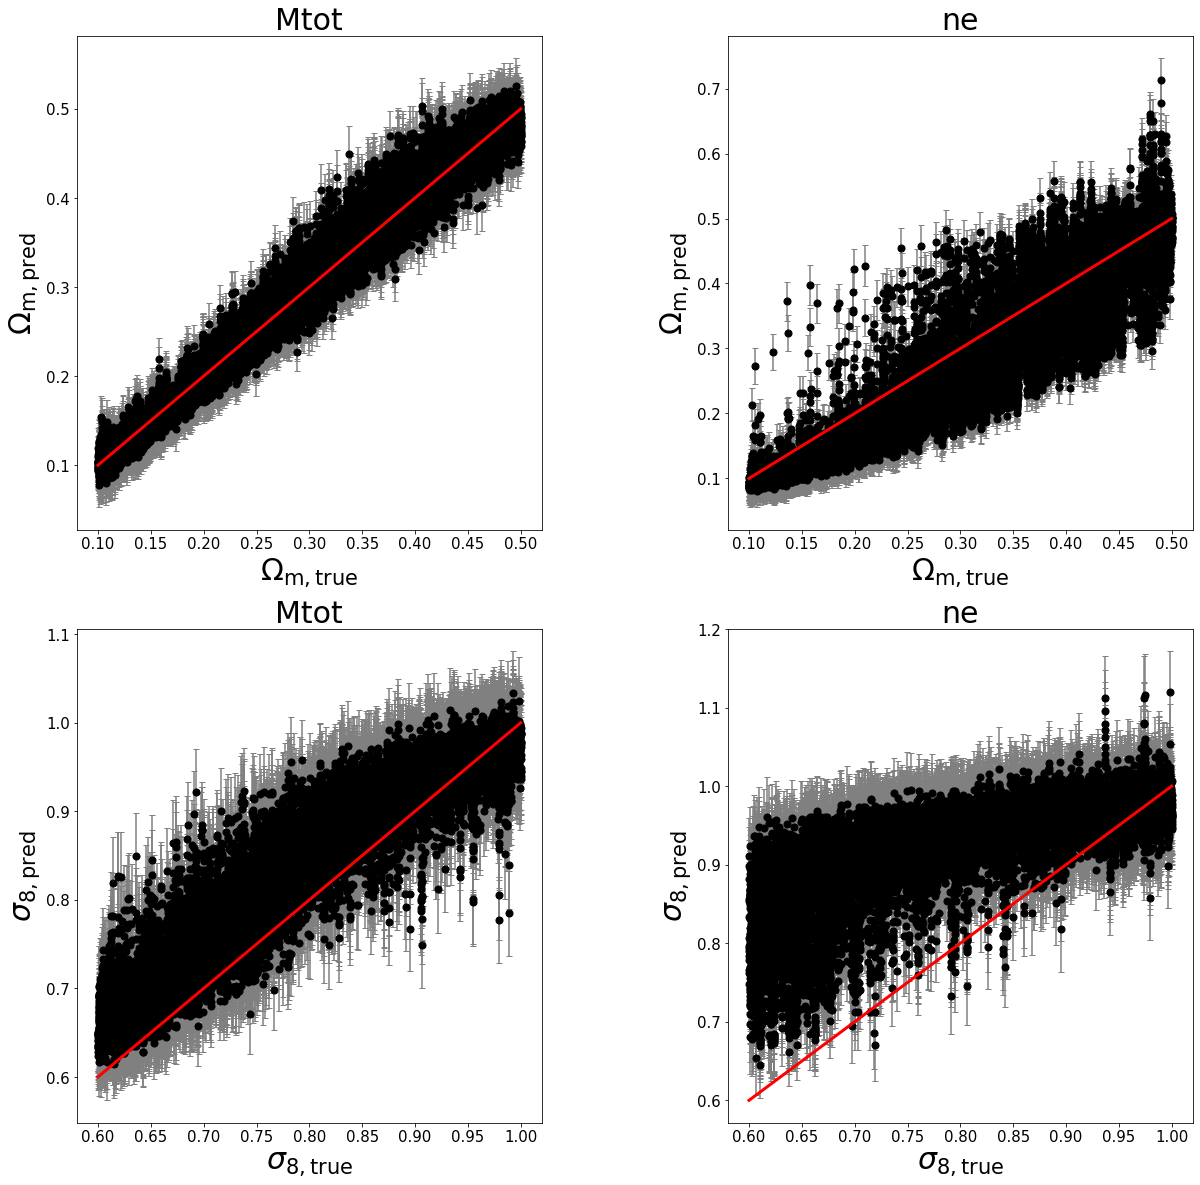

In [28]:
sim  = 'TNG'; field = ['Mtot', 'ne'] #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device,
            robust_axis='field'
        )
study_name = "TNG_Mtot_ne_cnn_mid_monopole_1"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
mist.make_plots_cnn(fname='cnn_test', save_plot=False)
mist.test_on_cnn('SIMBA', show_score=True)
mist.test_on_cnn('ASTRID', show_score=True)

$\Omega_m$: MSE=0.000, % error=5.277%, R2 score=0.970,chi2=0.688, bias=-0.004
$\sigma_8$: MSE=0.002, % error=4.346%, R2 score=0.847,chi2=0.786, bias=0.009
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.010, % error=17.552%, R2 score=0.263,chi2=39.499, bias=0.050
$\sigma_8$: MSE=0.021, % error=14.588%, R2 score=-0.567,chi2=9.035, bias=-0.045
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.002, % error=10.948%, R2 score=0.846,chi2=4.718, bias=0.012
$\sigma_8$: MSE=0.009, % error=9.837%, R2 score=0.323,chi2=3.285, bias=-0.066


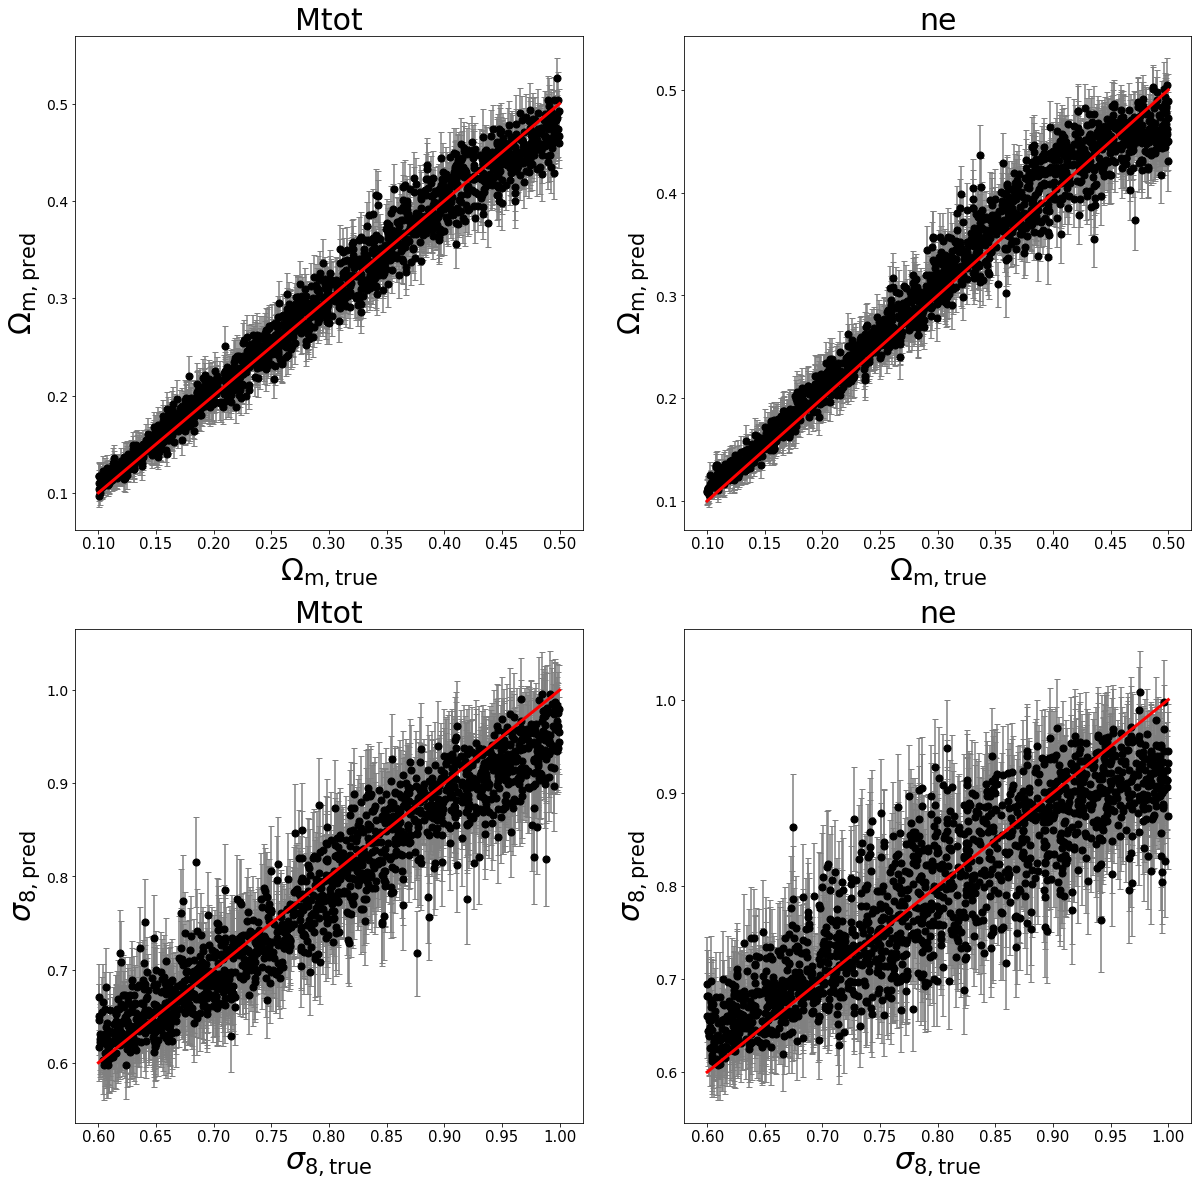

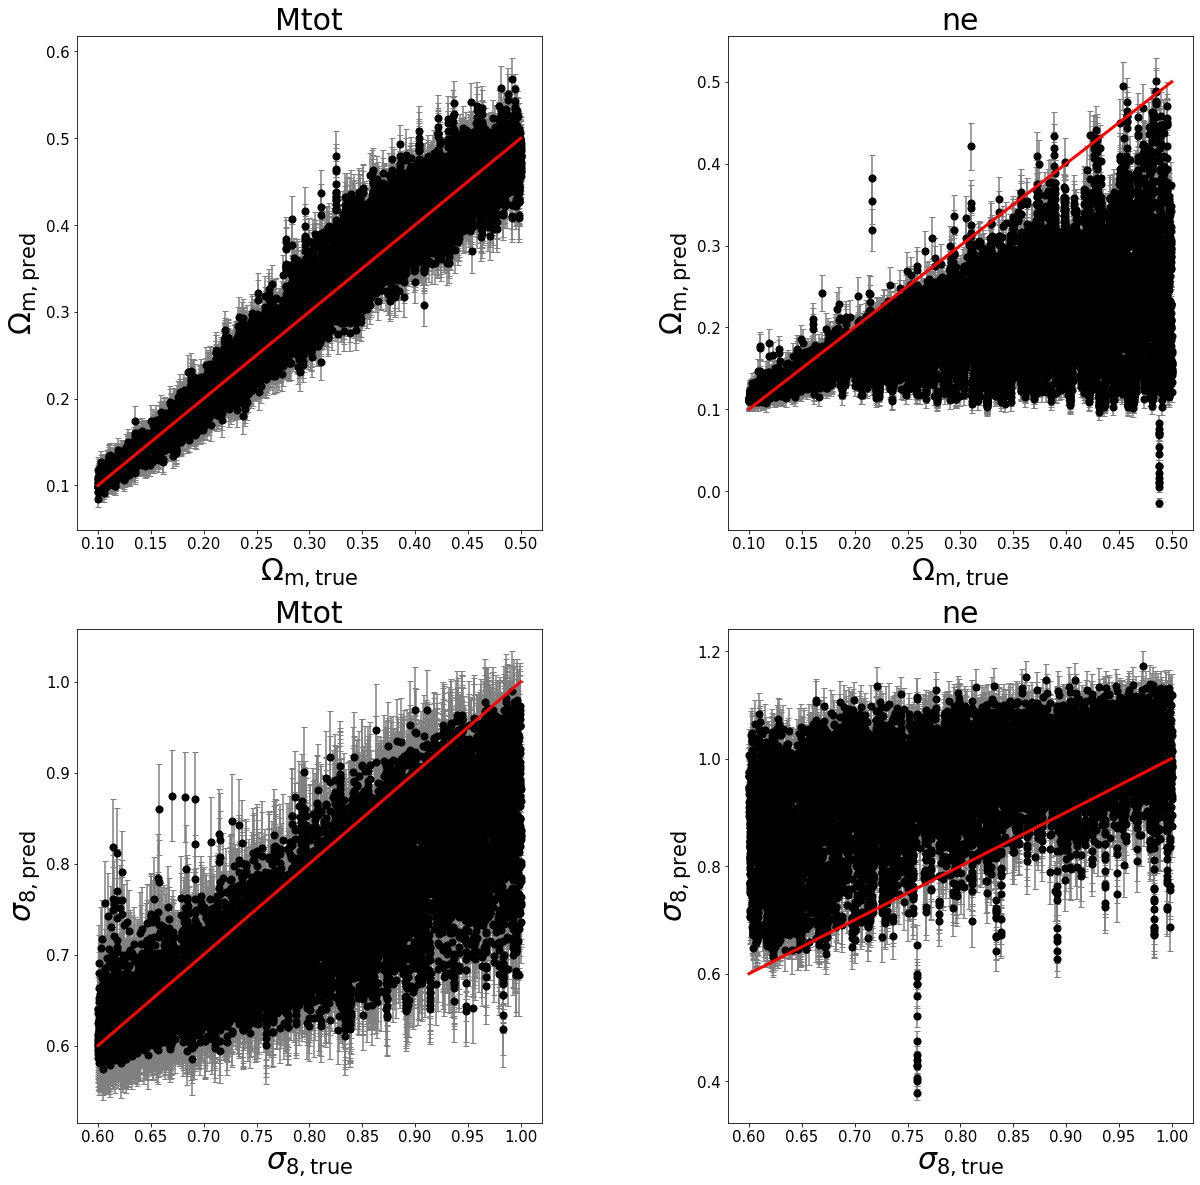

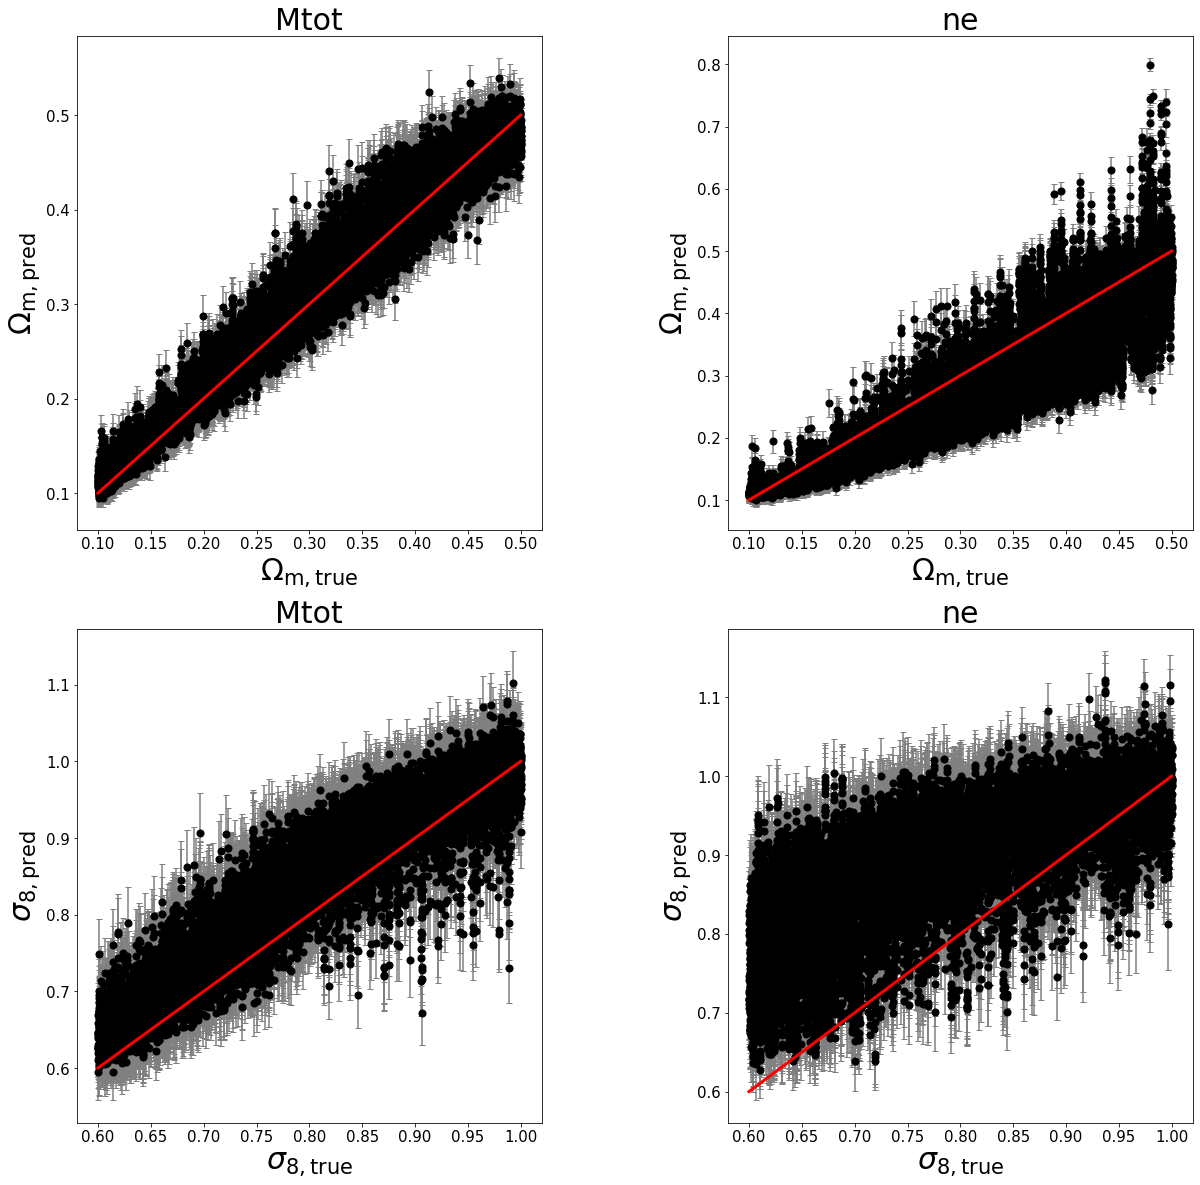

In [3]:
sim  = 'TNG'; field = ['Mtot', 'ne'] #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device,
            robust_axis='field'
        )
study_name = "TNG_Mtot_ne_cnn_high_monopole_1"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
mist.make_plots_cnn(fname='cnn_test', save_plot=False)
mist.test_on_cnn('SIMBA', show_score=True)
mist.test_on_cnn('ASTRID', show_score=True)

$\Omega_m$: MSE=0.000, % error=4.425%, R2 score=0.976,chi2=0.412, bias=-0.000
$\sigma_8$: MSE=0.002, % error=4.401%, R2 score=0.854,chi2=0.825, bias=0.007
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.012, % error=19.864%, R2 score=0.075,chi2=20.138, bias=0.058
$\sigma_8$: MSE=0.019, % error=13.652%, R2 score=-0.395,chi2=7.704, bias=-0.051
(30000, 1, 256, 256) (30000, 2)
$\Omega_m$: MSE=0.002, % error=11.817%, R2 score=0.844,chi2=3.037, bias=0.014
$\sigma_8$: MSE=0.013, % error=11.751%, R2 score=0.050,chi2=5.146, bias=-0.082


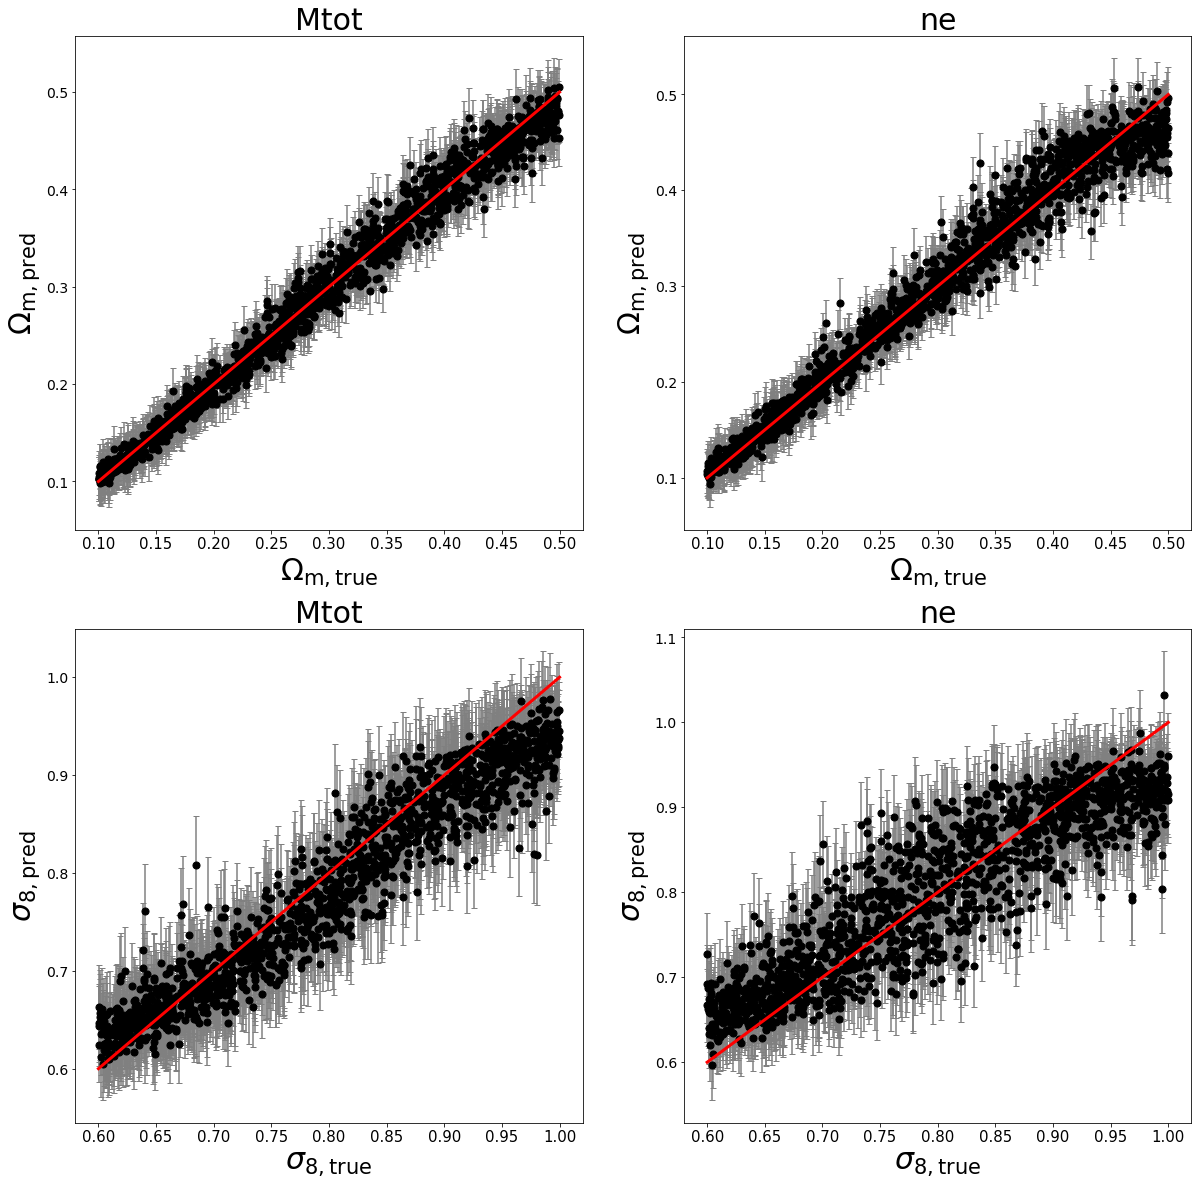

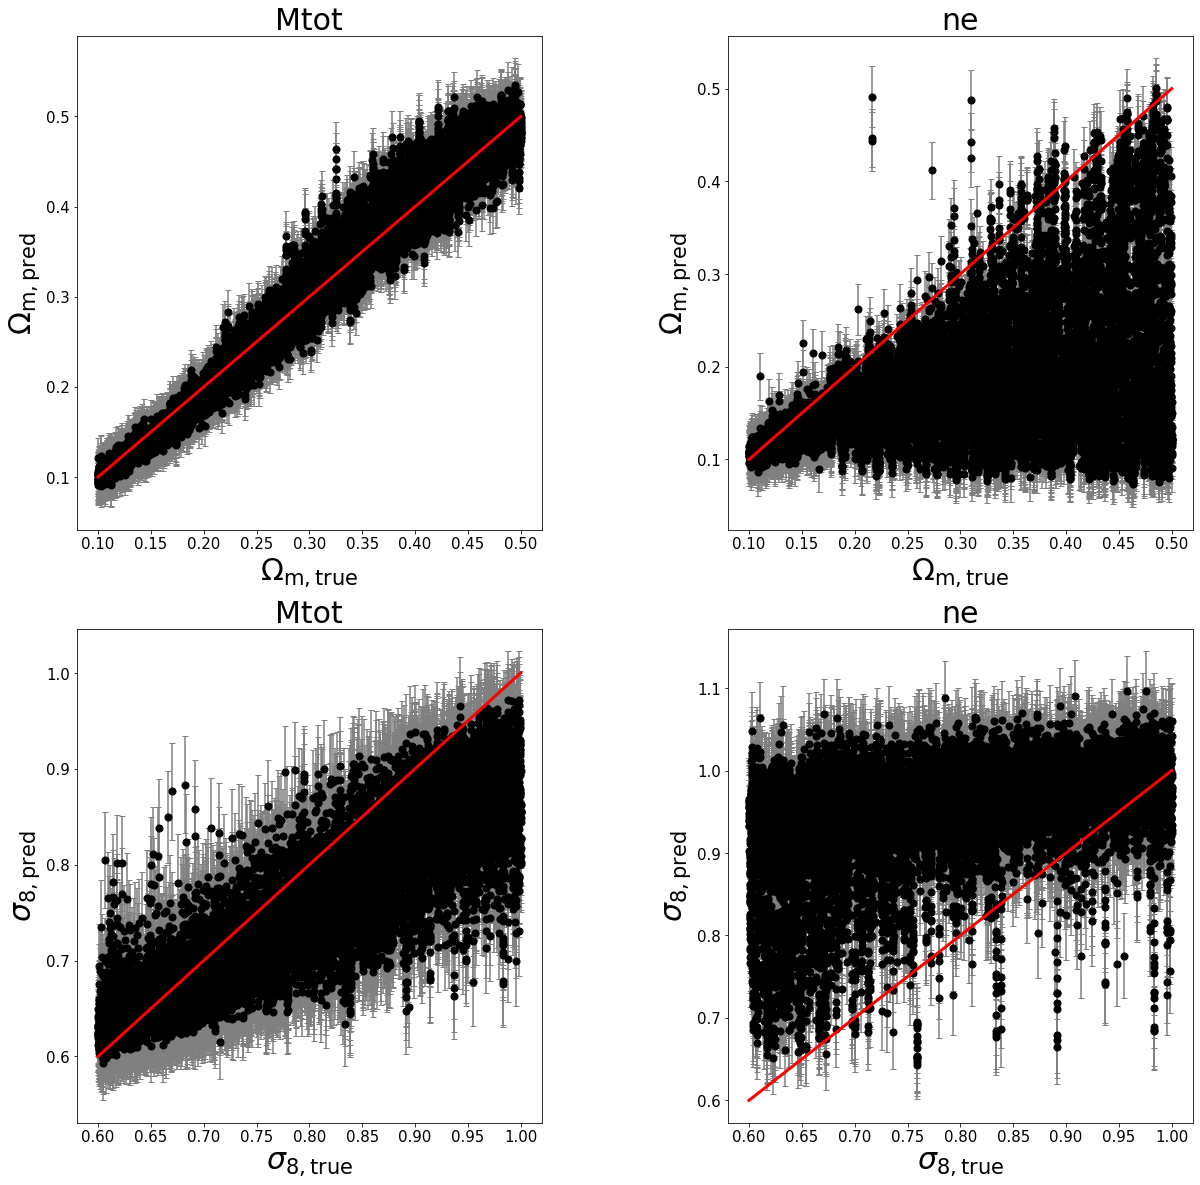

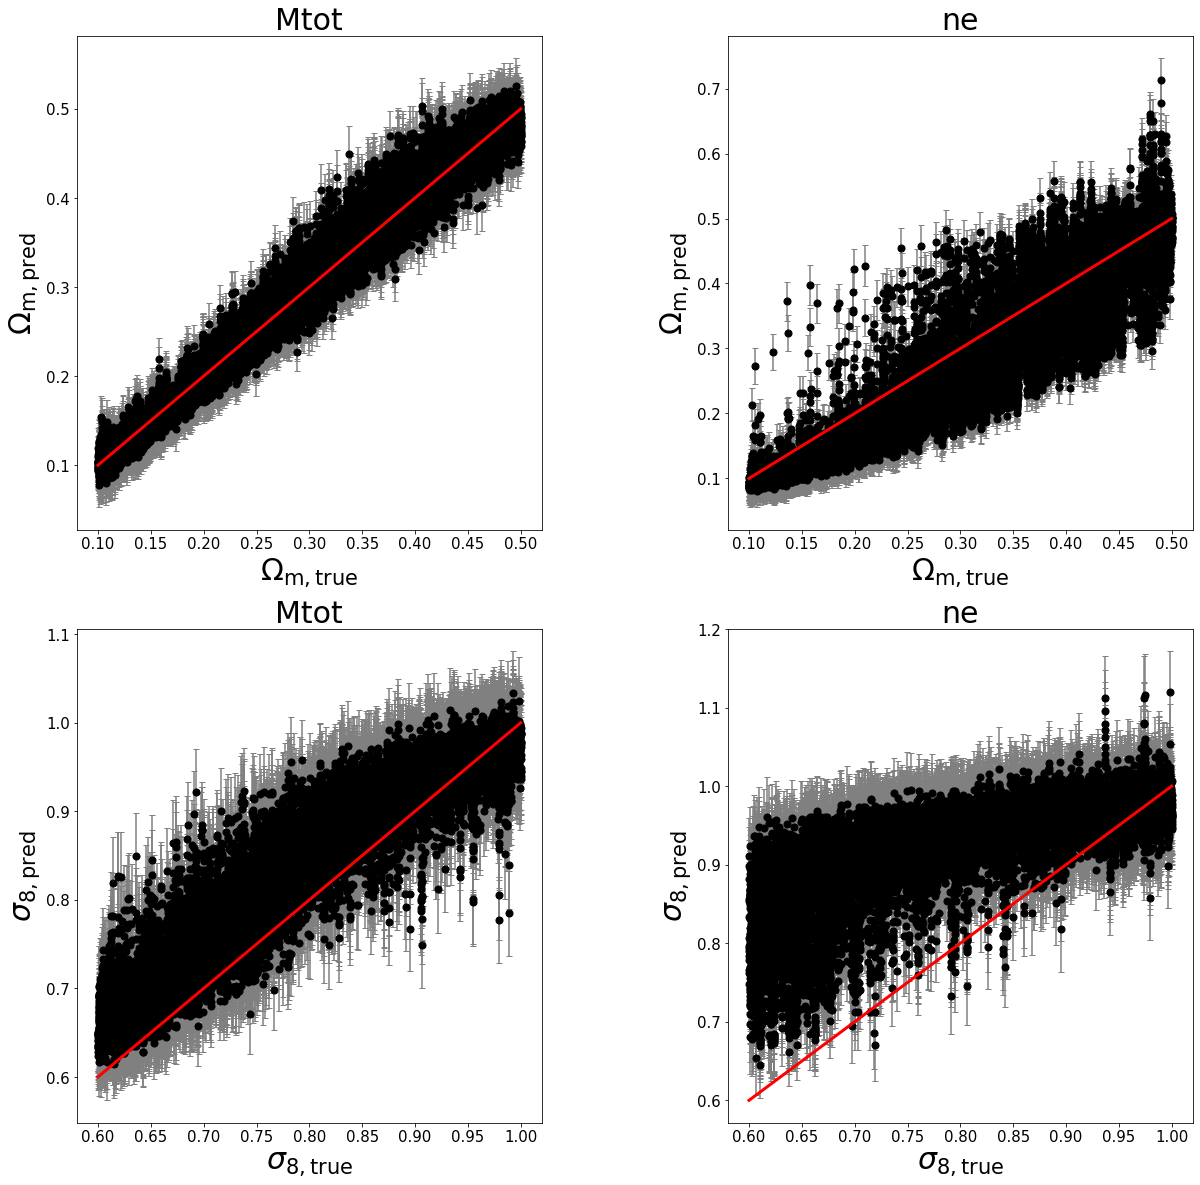

In [4]:
sim  = 'TNG'; field = ['Mtot', 'ne'] #['HI', 'Mtot', 'Mgas']

mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device,
            robust_axis='field'
        )
study_name = "TNG_Mtot_ne_cnn_mid_monopole_1"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
mist.make_plots_cnn(fname='cnn_test', save_plot=False)
mist.test_on_cnn('SIMBA', show_score=True)
mist.test_on_cnn('ASTRID', show_score=True)